<a href="https://colab.research.google.com/github/aabdelmak/Data-Analysis-and-Machine-Learning-Projects/blob/master/UpdatedDissertationCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib import style
import seaborn as sns
import matplotlib
%matplotlib inline

plt.style.use("seaborn")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

import tensorflow as tf
import tensorflow.keras
import sklearn as sk
from sklearn import svm, neighbors, preprocessing
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, TimeSeriesSplit

from datetime import datetime as dt
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

from __future__ import absolute_import, division, print_function, unicode_literals

import os
import datetime as dt
import bs4 as bs
import pickle
import requests
import time
import numpy as np
from collections import Counter



import pandas_datareader.data as pdr
!pip install yfinance
import yfinance as yf
yf.pdr_override

import prettytable as pt



In [ ]:
def get_data_from_yahoo():

    tickers = ["^GSPC", "^DJI", "^NYA", "^GDAXI", "^IXIC",
               "^FCHI", "^HSI", "^N225", "^RUT", "^VIX"]
            
    if not os.path.exists("index_dfs"):
        os.makedirs("index_dfs")
    start = dt.datetime(1991, 12, 15)
    end = dt.datetime.now()
    
    for ticker in tickers:
        print(ticker)
        
        if not os.path.exists("index_dfs/{}.csv".format(ticker)):
            time.sleep(3)
            df = pdr.get_data_yahoo(ticker, start, end)
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            df.to_csv("index_dfs/{}.csv".format(ticker))
            time.sleep(3)
        else:
            print("Already have {}".format(ticker))
            
get_data_from_yahoo()

def compile_data():
    tickers = ["^GSPC", "^DJI", "^NYA", "^GDAXI", "^IXIC",
               "^FCHI", "^HSI", "^N225", "^RUT", "^VIX"]
        
    main_df = pd.DataFrame()
    for count,ticker in enumerate(tickers):
        df = pd.read_csv("index_dfs/{}.csv".format(ticker))
        df.set_index("Date", inplace = True)
        
        df.rename(columns = {"Adj Close": "{} Adj Close".format(ticker),
                            "Open": "{} Open".format(ticker),
                            "High": "{} High".format(ticker),
                            "Low" : "{} Low".format(ticker),
                            "Volume":"{} Volume".format(ticker)},
                   inplace = True)
        df.drop("Close", axis = 1, inplace = True)
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how = "outer") 
        if count % 10 == 0:
            print(count)
        print(main_df.head())
        main_df.to_csv("Indices.csv")
compile_data()



^GSPC
Already have ^GSPC
^DJI
Already have ^DJI
^NYA
Already have ^NYA
^GDAXI
Already have ^GDAXI
^IXIC
Already have ^IXIC
^FCHI
Already have ^FCHI
^HSI
Already have ^HSI
^N225
Already have ^N225
^RUT
Already have ^RUT
^VIX
Already have ^VIX
0
            ^GSPC High   ^GSPC Low  ^GSPC Open  ^GSPC Volume  ^GSPC Adj Close
Date                                                                         
1991-12-16  385.839996  384.369995  384.480011     173080000       384.459991
1991-12-17  385.049988  382.600006  384.459991     191310000       382.739990
1991-12-18  383.510010  380.880005  382.739990     192410000       383.480011
1991-12-19  383.459991  380.640015  383.459991     199330000       382.519989
1991-12-20  388.239990  382.519989  382.519989     316140000       387.040009
            ^GSPC High   ^GSPC Low  ...  ^DJI Volume  ^DJI Adj Close
Date                                ...                             
1991-12-16  385.839996  384.369995  ...     17630000     2919.050049
199

In [ ]:
# start_date = "1991-12-15"
# end_date = "2020-09-15"
TBill = pd.read_csv("DGS10 (1).csv", index_col=0)
TBill = TBill.iloc[510:-56]


After compiling the csv file with the desired tickers, we select the columns that we wish to load into a dataframe.


In [ ]:
#pre-define dates and tickers 
tickers = ["^GSPC", "^DJI", "^NYA", "^GDAXI", "^IXIC",
           "^FCHI", "^HSI", "^N225", "^RUT", "^VIX"]
start_date = "1991-12-15"
end_date = "2020-09-15"
dates = pd.date_range(start_date, end_date)
#select columns from data
def select_columns_from_data(data, ticker_list, column_names): 
    df = pd.DataFrame(index = dates)
    for ticker in ticker_list:
      for column_name in column_names:
        df_temp = pd.read_csv("/content/Indices.csv", index_col = "Date",
                             parse_dates = True, usecols =\
                              ["Date", "{} {}".format(ticker, column_name)], 
                              na_values = ["nan"])
        df = df.join(df_temp)
        if ticker == "^GSPC": # drop dates SPY did not trade
          df = df.dropna(subset=["^GSPC {}".format(column_name)])
            
    return df    
    
price_data = select_columns_from_data(pd.read_csv("Indices.csv"), tickers, 
                         ["Adj Close", "High", "Low", "Open"])
volume_data = select_columns_from_data(pd.read_csv("Indices.csv"), tickers,
                                       ["Volume"])
        
#Fill NA values
price_data.fillna(method = "ffill", inplace = True)
price_data.fillna(method = "bfill", inplace = True)
volume_data.fillna(method = "ffill", inplace = True)
volume_data.fillna(method = "bfill", inplace = True)

#price_data[:252] #252
#price_data[253:500] #247
price_data
volume_data

,^GSPC Volume,^DJI Volume,^NYA Volume,^GDAXI Volume,^IXIC Volume,^FCHI Volume,^HSI Volume,^N225 Volume,^RUT Volume,^VIX Volume
1991-12-16,1.730800e+08,17630000.0,0.000000e+00,0.0,1.484000e+08,0.0,0.000000e+00,0.0,1730100.0,0.0
1991-12-17,1.913100e+08,18290000.0,0.000000e+00,0.0,1.911200e+08,0.0,0.000000e+00,0.0,1912800.0,0.0
1991-12-18,1.924100e+08,19800000.0,0.000000e+00,0.0,1.767800e+08,0.0,0.000000e+00,0.0,1923500.0,0.0
1991-12-19,1.993300e+08,20070000.0,0.000000e+00,0.0,1.745800e+08,0.0,0.000000e+00,0.0,1998300.0,0.0
1991-12-20,3.161400e+08,39480000.0,0.000000e+00,0.0,1.892600e+08,0.0,0.000000e+00,0.0,3138100.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-09-09,3.920830e+09,460590000.0,3.920830e+09,73655700.0,3.531780e+09,86318500.0,1.749348e+09,84400.0,39208300.0,0.0
2020-09-10,4.192250e+09,442850000.0,4.192250e+09,56811700.0,3.814100e+09,70699400.0,1.349478e+09,67600.0,41922500.0,0.0
2020-09-11,3.704450e+09,435330000.0,3.704450e+09,57027900.0,3.609190e+09,70572900.0,1.306599e+09,76900.0,37044500.0,0.0
2020-09-14,3.832130e+09,380750000.0,3.832130e+09,49242800.0,3.716820e+09,57540800.0,1.091381e+09,65400.0,38321300.0,0.0


In [ ]:
closing_data = get_closing_data_for_plot(tickers, price_data,"Adj Close")

closing_data
vix_closing_data = pd.DataFrame(closing_data.pop("^VIX Adj Close") ,
                                index = closing_data.index)


# Exploratory Data Analysis

In [ ]:
colorlist = ["turquoise", "silver", "orange", "violet", "red", "gold", "lightgreen", "purple", "yellow", "cornflowerblue"]

#Plot data        
font = {'family': 'Serif',
        'color':  'black',
        'weight': 'normal',
        'size': 40,
        }

def plot_data(df, savefig, label):
    """Plot stock prices"""
    ax = df.plot(grid = True, figsize = (20, 10), cmap = "Spectral")
    datemin = np.datetime64(df.index.values[22], 'Y')
    datemax = np.datetime64(df.index.values[-1], 'Y') + np.timedelta64(1, 'Y') 
    ax.set_xlim(datemin, datemax)
    ax.set_xlabel("Date", fontsize = 30, fontdict = font)
    ax.set_ylabel("Price", fontsize = 30, fontdict = font)
    plt.title("{}".format(label),fontdict = font )
    

    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=52))
# set formatter

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    # set font and rotation for date tick labels  
    plt.gcf().autofmt_xdate()
    plt.xticks(rotation = 0)
    plt.rc("legend", fontsize=20)
    plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=20)
    ax.legend(fontsize = 20)
    plt.savefig(savefig)
    
    
    plt.show()

#define closing_prices for plot
def get_closing_data_for_plot(tickers, from_data, column):
  closing_data = pd.DataFrame(index = from_data.index)
  for ticker in tickers:
    tmp = from_data.pop("{} {}".format(ticker, column))
    closing_data= closing_data.join(tmp)
  return closing_data



def plot_data(df, savefig, label, suffix,tickers):
    """Plot stock prices"""
    counter = 0
    for tick in tickers:
      ax = df["{} {}".format(tick, suffix)].plot(figsize = (20, 10), label = "{}".format(tick), color = colorlist[counter], alpha = .6)
      counter += 1
    datemin = np.datetime64(df.index.values[22], 'Y')
    datemax = np.datetime64(df.index.values[-1], 'Y') + np.timedelta64(1, 'Y') 
    ax.set_xlim(datemin, datemax)
    ax.set_xlabel("Date", fontsize = 30, fontdict = font)
    ax.set_ylabel("Price", fontsize = 30, fontdict = font)
    plt.title("{}".format(label),fontdict = font )
    

    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=54))
# set formatter

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    # set font and rotation for date tick labels  
    plt.gcf().autofmt_xdate()
    plt.xticks(rotation = 0)
    plt.rc("legend", fontsize=20)
    plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=20)
    
    ax.legend(loc = "upper left", fontsize = 15, facecolor = "white", frameon=True, framealpha =.7)

    plt.savefig(savefig)
    
    
    plt.show()


In [ ]:
closing_data = closing_data.join(vix_closing_data["^VIX Adj Close"])

In [ ]:
closing_data

,^GSPC Adj Close,^DJI Adj Close,^NYA Adj Close,^GDAXI Adj Close,^IXIC Adj Close,^FCHI Adj Close,^HSI Adj Close,^N225 Adj Close,^RUT Adj Close,^VIX Adj Close
1991-12-16,384.459991,2919.050049,2242.479980,1551.780029,543.729980,1696.800049,4171.700195,22836.669922,178.550003,17.620001
1991-12-17,382.739990,2902.280029,2233.280029,1562.890015,539.700012,1711.699951,4185.000000,22736.289062,177.660004,18.120001
1991-12-18,383.480011,2908.090088,2235.709961,1570.280029,539.840027,1706.199951,4177.700195,22629.900391,177.369995,17.780001
1991-12-19,382.519989,2914.360107,2230.110107,1559.260010,534.530029,1684.199951,4182.799805,21991.189453,176.199997,17.959999
1991-12-20,387.040009,2934.479980,2253.580078,1545.869995,535.760010,1648.500000,4142.600098,21777.119141,176.070007,17.650000
...,...,...,...,...,...,...,...,...,...,...
2020-09-09,3398.959961,27940.470703,12885.799805,13237.209961,11141.559570,5042.979980,24468.929688,23032.539062,1526.479980,28.809999
2020-09-10,3339.189941,27534.580078,12706.690430,13208.889648,10919.589844,5023.930176,24313.539062,23235.470703,1507.750000,29.709999
2020-09-11,3340.969971,27665.640625,12773.040039,13202.839844,10853.549805,5034.140137,24503.310547,23406.490234,1497.270020,26.870001
2020-09-14,3383.540039,27993.330078,12932.690430,13193.660156,11056.650391,5051.879883,24640.279297,23559.300781,1536.969971,25.850000


In [ ]:
#scaler = MinMaxScaler(feature_range = (0,1))
#scaled_price_data = scaler.fit_transform(price_data) 
#scaled_price_data= pd.DataFrame(scaled_price_data, index = price_data.index, columns = price_data.columns)

#names = ["High", "Low","Open"]
#counter = 0

#scaled_price_data


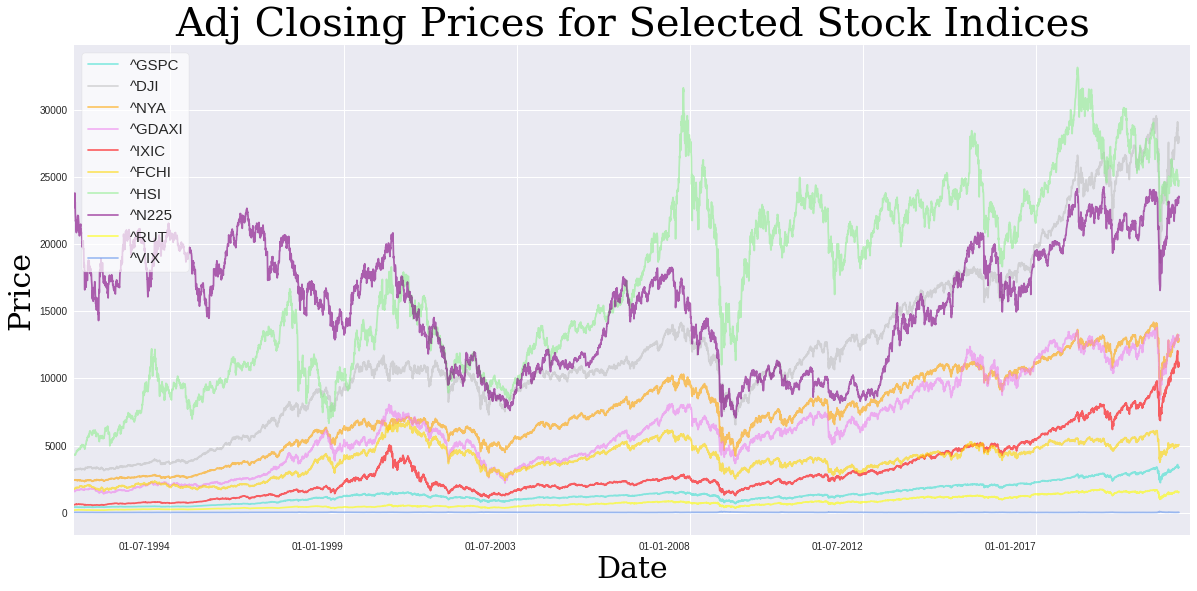

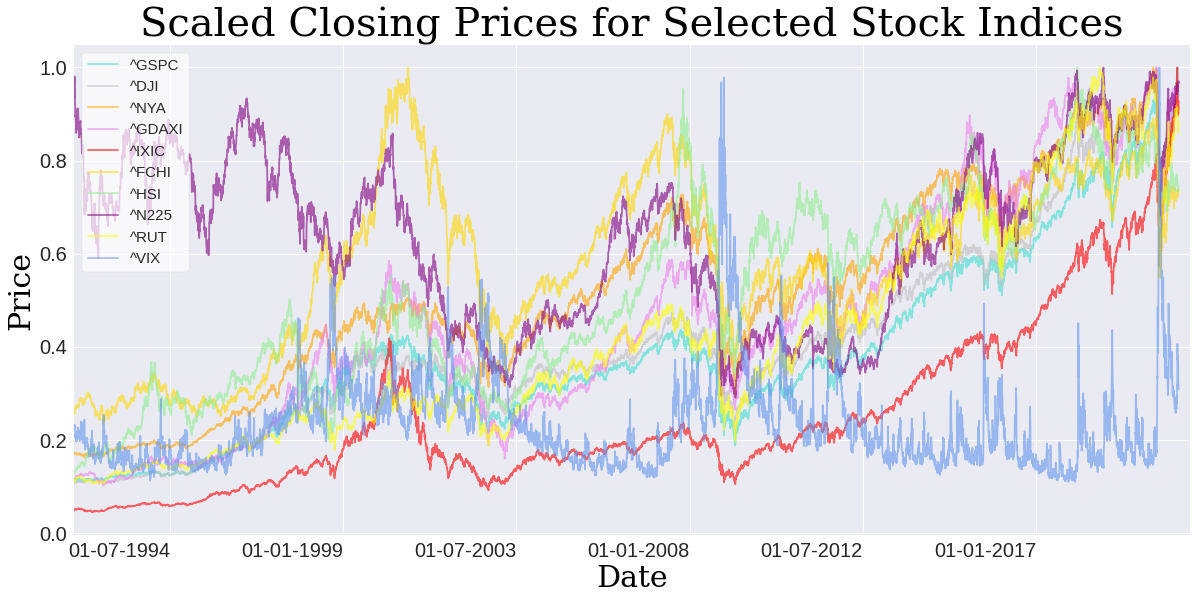

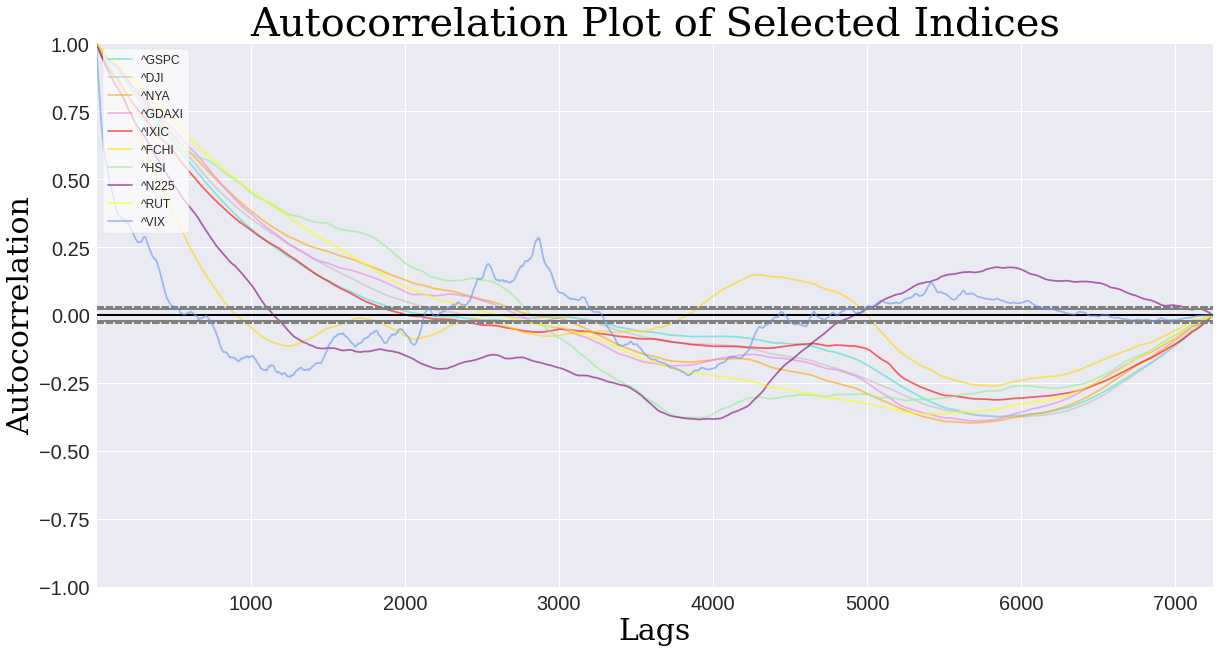

In [ ]:
plot_data(closing_data, "Adj Close.pdf","Adj Closing Prices for Selected Stock Indices", "Adj Close", tickers)
scaled_data = closing_data.copy()

for column in scaled_data:
  scaled_data[column]= scaled_data[column]/max(scaled_data[column])
for ticker in tickers: 
  scaled_data =scaled_data.rename(columns = {"{} Adj Close".format(ticker): "{} Scaled Close".format(ticker)})
scaled_data

plot_data(scaled_data, "Scaled Close.pdf", "Scaled Closing Prices for Selected Stock Indices", "Scaled Close", tickers)

def plot_autocorrelation(df, savefig, tickerlist, datacolumn):
  fig = plt.figure()
  fig.set_figwidth(20)
  fig.set_figheight(10)
  counter = 0
  for ticker in tickerlist:
    ax = autocorrelation_plot(df["{} {}".format(ticker, datacolumn)], label = "{}".format(ticker), color = colorlist[counter], alpha = .6 )
    counter += 1
  ax.set_xlabel("Lags", fontsize = 30, fontdict = font)
  ax.set_ylabel("Autocorrelation", fontsize = 30, fontdict = font)
  
  plt.title("Autocorrelation Plot of Selected Indices", fontdict = font)
  ax.legend(loc = "upper left", fontsize = 12, facecolor = "white", frameon=True, framealpha =.7)
  plt.savefig(savefig)

#plot_autocorrelation(df = closing_data,
 #                    savefig = "Autocorrelation Plot of Closing Data.pdf",
  #                   tickerlist = tickers, datacolumn = "Adj Close")

plot_autocorrelation(closing_data, "Autocorrelation Closing data.pdf",tickers, "Adj Close")
#plot_frame.describe()

In [ ]:
#plot_scatter_matrix(df = closing_data,
 #                   savefig = "Scatter Plot of Closing Data.pdf",
  #                  tickerlist = tickers, datacolumn = "Adj Close")

closing_data

,^GSPC Adj Close,^DJI Adj Close,^NYA Adj Close,^GDAXI Adj Close,^IXIC Adj Close,^FCHI Adj Close,^HSI Adj Close,^N225 Adj Close,^RUT Adj Close,^VIX Adj Close
1991-12-16,384.459991,2919.050049,2242.479980,1551.780029,543.729980,1696.800049,4171.700195,22836.669922,178.550003,17.620001
1991-12-17,382.739990,2902.280029,2233.280029,1562.890015,539.700012,1711.699951,4185.000000,22736.289062,177.660004,18.120001
1991-12-18,383.480011,2908.090088,2235.709961,1570.280029,539.840027,1706.199951,4177.700195,22629.900391,177.369995,17.780001
1991-12-19,382.519989,2914.360107,2230.110107,1559.260010,534.530029,1684.199951,4182.799805,21991.189453,176.199997,17.959999
1991-12-20,387.040009,2934.479980,2253.580078,1545.869995,535.760010,1648.500000,4142.600098,21777.119141,176.070007,17.650000
...,...,...,...,...,...,...,...,...,...,...
2020-09-09,3398.959961,27940.470703,12885.799805,13237.209961,11141.559570,5042.979980,24468.929688,23032.539062,1526.479980,28.809999
2020-09-10,3339.189941,27534.580078,12706.690430,13208.889648,10919.589844,5023.930176,24313.539062,23235.470703,1507.750000,29.709999
2020-09-11,3340.969971,27665.640625,12773.040039,13202.839844,10853.549805,5034.140137,24503.310547,23406.490234,1497.270020,26.870001
2020-09-14,3383.540039,27993.330078,12932.690430,13193.660156,11056.650391,5051.879883,24640.279297,23559.300781,1536.969971,25.850000


In [ ]:
def plot_data(df, savefig, label):
    """Plot stock prices"""
    ax = df.plot(grid = True, figsize = (20, 10))
    datemin = np.datetime64(df.index.values[22], 'Y')
    datemax = np.datetime64(df.index.values[-1], 'Y') + np.timedelta64(1, 'Y') 
    ax.set_xlim(datemin, datemax)
    ax.set_xlabel("date", fontsize = 30, fontdict = font)
    ax.set_ylabel("price", fontsize = 30, fontdict = font)
    plt.title("{}".format(label),fontdict = font )
    

    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=25))
# set formatter

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    # set font and rotation for date tick labels  
    plt.gcf().autofmt_xdate()
    plt.rc("legend", fontsize=20)
    plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=20)
    ax.legend(fontsize = 20)
    plt.savefig(savefig)
    
    
    plt.show()



In [ ]:
#plot_data(vix_closing_data,"VIX Adj Close.pdf", "Adj Closing Prices for Volatility Index (VIX)")

#price_data, volume_data
returns_data.isna().sum()

^GSPC Adj Close        0
^DJI Adj Close         0
^NYA Adj Close         0
^GDAXI Adj Close       0
^IXIC Adj Close        0
                    ... 
^N225_EVM           1337
^N225_EVM_14d_MA    2706
^RUT_EVM               1
^RUT_EVM_14d_MA       14
^VIX_EVM            7242
Length: 409, dtype: int64

In [ ]:
def compute_daily_returns(df, tickerlist):
    newdf = pd.DataFrame(index = df.index)
    for column in df:
      df_temp = (df[column]/df[column].shift())-1
      newdf = newdf.join(df_temp)
      newdf = newdf.dropna()
    for ticker in tickers:
      newdf = newdf.rename(columns = {"{} Adj Close".format(ticker) : "{} Daily Return".format(ticker)})
    returns_data = df.copy()
    returns_data = returns_data.join(newdf)
    return returns_data

def compute_cumulative_returns(df, tickers, final_dataset):
  newdf = pd.DataFrame(index = df.index)
  newdf = (df[:]/df.iloc[0].values)-1
  newdf = newdf.dropna()
  for ticker in tickers:
    newdf = newdf.rename(columns = {"{} Adj Close".format(ticker) : "{} Cumulative Returns".format(ticker)})
  final_dataset = final_dataset.join(newdf)
  return final_dataset

      

#########################################################

tickers = ["^GSPC", "^DJI", "^NYA", "^GDAXI", "^IXIC","^FCHI", "^HSI", "^N225", "^RUT", "^VIX"]

returns_data = compute_daily_returns(closing_data, tickers)
returns_data = compute_cumulative_returns(closing_data, tickers, returns_data)
returns_data

#######################################################
# def plot_return_data(df, savefig, label, title):
#     """Plot stock prices"""
#     ax = df.plot(grid = True, figsize = (20, 10), cmap = )
#     datemin = np.datetime64(df.index.values[22], 'Y')
#     datemax = np.datetime64(df.index.values[-1], 'Y') + np.timedelta64(1, 'Y') 
#     ax.set_xlim(datemin, datemax)
#     ax.set_xlabel("Date", fontsize = 30, fontdict = font)
#     ax.set_ylabel("Return Value", fontsize = 30, fontdict = font)
#     plt.title("{}".format(title),fontdict = font )
    

#     ax.xaxis.set_major_locator(mdates.MonthLocator(interval= 54))
# # set formatter

#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#     # set font and rotation for date tick labels  
#     plt.gcf().autofmt_xdate()
#     plt.xticks(rotation = 0)
#     plt.rc("legend", fontsize=20)
#     plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
#     plt.rc('ytick', labelsize=20)
#     ax.legend(loc = "upper left",fontsize = 20)
#     plt.savefig(savefig)
    
    
#     plt.show()

def plot_return_data(df, savefig, label, suffix,tickers):
    """Plot stock prices"""
    counter = 0
    for tick in tickers:
      ax = df["{} {}".format(tick, suffix)].plot(figsize = (20, 10), label = "{}".format(tick), color = colorlist[counter], alpha = .6)
      counter += 1
    datemin = np.datetime64(df.index.values[22], 'Y')
    datemax = np.datetime64(df.index.values[-1], 'Y') + np.timedelta64(1, 'Y') 
    ax.set_xlim(datemin, datemax)
    ax.set_xlabel("Date", fontsize = 30, fontdict = font)
    ax.set_ylabel("Return", fontsize = 30, fontdict = font)
    plt.title("{}".format(label),fontdict = font )
    

    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=54))
# set formatter

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    # set font and rotation for date tick labels  
    plt.gcf().autofmt_xdate()
    plt.xticks(rotation = 0)
    plt.rc("legend", fontsize=20)
    plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=20)
    
    ax.legend(loc = "upper left", fontsize = 15, facecolor = "white", frameon=True, framealpha =.7)

    plt.savefig(savefig)
    
    
    plt.show()



In [ ]:
returns_data

,^GSPC Adj Close,^DJI Adj Close,^NYA Adj Close,^GDAXI Adj Close,^IXIC Adj Close,^FCHI Adj Close,^HSI Adj Close,^N225 Adj Close,^RUT Adj Close,^VIX Adj Close,^GSPC Daily Return,^DJI Daily Return,^NYA Daily Return,^GDAXI Daily Return,^IXIC Daily Return,^FCHI Daily Return,^HSI Daily Return,^N225 Daily Return,^RUT Daily Return,^VIX Daily Return,^GSPC Cumulative Returns,^DJI Cumulative Returns,^NYA Cumulative Returns,^GDAXI Cumulative Returns,^IXIC Cumulative Returns,^FCHI Cumulative Returns,^HSI Cumulative Returns,^N225 Cumulative Returns,^RUT Cumulative Returns,^VIX Cumulative Returns
1991-12-16,384.459991,2919.050049,2242.479980,1551.780029,543.729980,1696.800049,4171.700195,22836.669922,178.550003,17.620001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1991-12-17,382.739990,2902.280029,2233.280029,1562.890015,539.700012,1711.699951,4185.000000,22736.289062,177.660004,18.120001,-0.004474,-0.005745,-0.004103,0.007160,-0.007412,0.008781,0.003188,-0.004396,-0.004985,0.028377,-0.004474,-0.005745,-0.004103,0.007160,-0.007412,0.008781,0.003188,-0.004396,-0.004985,0.028377
1991-12-18,383.480011,2908.090088,2235.709961,1570.280029,539.840027,1706.199951,4177.700195,22629.900391,177.369995,17.780001,0.001933,0.002002,0.001088,0.004728,0.000259,-0.003213,-0.001744,-0.004679,-0.001632,-0.018764,-0.002549,-0.003755,-0.003019,0.011922,-0.007154,0.005540,0.001438,-0.009054,-0.006609,0.009081
1991-12-19,382.519989,2914.360107,2230.110107,1559.260010,534.530029,1684.199951,4182.799805,21991.189453,176.199997,17.959999,-0.002503,0.002156,-0.002505,-0.007018,-0.009836,-0.012894,0.001221,-0.028224,-0.006596,0.010124,-0.005046,-0.001607,-0.005516,0.004820,-0.016920,-0.007426,0.002661,-0.037023,-0.013162,0.019296
1991-12-20,387.040009,2934.479980,2253.580078,1545.869995,535.760010,1648.500000,4142.600098,21777.119141,176.070007,17.650000,0.011816,0.006904,0.010524,-0.008587,0.002301,-0.021197,-0.009611,-0.009734,-0.000738,-0.017261,0.006711,0.005286,0.004950,-0.003809,-0.014658,-0.028465,-0.006976,-0.046397,-0.013890,0.001703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-09,3398.959961,27940.470703,12885.799805,13237.209961,11141.559570,5042.979980,24468.929688,23032.539062,1526.479980,28.809999,0.020145,0.015984,0.015584,0.020734,0.027090,0.013966,-0.006311,-0.010380,0.014549,-0.084234,7.840868,8.571768,4.746227,7.530339,19.490979,1.972053,4.865457,0.008577,7.549314,0.635074
2020-09-10,3339.189941,27534.580078,12706.690430,13208.889648,10919.589844,5023.930176,24313.539062,23235.470703,1507.750000,29.709999,-0.017585,-0.014527,-0.013900,-0.002139,-0.019923,-0.003777,-0.006351,0.008811,-0.012270,0.031239,7.685403,8.432719,4.666356,7.512089,19.082744,1.960826,4.828209,0.017463,7.444413,0.686152
2020-09-11,3340.969971,27665.640625,12773.040039,13202.839844,10853.549805,5034.140137,24503.310547,23406.490234,1497.270020,26.870001,0.000533,0.004760,0.005222,-0.000458,-0.006048,0.002032,0.007805,0.007360,-0.006951,-0.095591,7.690033,8.477618,4.695944,7.508190,18.961286,1.966843,4.873699,0.024952,7.385718,0.524972
2020-09-14,3383.540039,27993.330078,12932.690430,13193.660156,11056.650391,5051.879883,24640.279297,23559.300781,1536.969971,25.850000,0.012742,0.011845,0.012499,-0.000695,0.018713,0.003524,0.005590,0.006529,0.026515,-0.037961,7.800760,8.589877,4.767138,7.502275,19.334818,1.977298,4.906532,0.031643,7.608065,0.467083


In [ ]:

# plot_return_data(returns_data.iloc[:, :], "dailyreturns.pdf","Daily Returns for Selected Stock Indices", "Daily Return", tickers)




# # plot_return_data(returns_data.iloc[:,10:-11], "Stock Daily Returns.pdf", 
# #                  label = tickers, 
# #                  title = "Plot of Daily Returns for Selected Stock Indices"),\
                 
# # plot_return_data(returns_data.iloc[:,-10:-2], "Stock Cumulative Returns.pdf", label = tickers)

# plot_autocorrelation(returns_data, "Autocorrelation of Daily Returns.pdf", tickers, "Daily Return")




In [ ]:
# def Kurtosis(data, tickerlist):
#     fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7), (ax8, ax9)) = plt.subplots(
#         nrows=5, ncols=2, figsize = (20, 16))
#     n_bins = 50
#     k0= data["{} Daily Return".format(tickerlist[0])].kurtosis()   
#     ax0.hist(data["{} Daily Return".format(tickerlist[0])], n_bins, density=True, 
#              histtype='bar', label= str(tickerlist[0]), color = colorlist[0])
#     ax0.legend(prop={'size': 20})
#     ax0.set_title('GSPC Daily Returns Histogram, Kurtosis: {0:.2f}'.format(k0), fontsize = 20)
#     k1= data["{} Daily Return".format(tickerlist[1])].kurtosis()
#     ax1.hist(data["{} Daily Return".format(tickerlist[1])], n_bins, density=True, 
#              histtype='bar', stacked=True, label= str(tickerlist[1]), color = colorlist[0])
#     ax1.legend(prop={'size': 20})
#     ax1.set_title('DJI Daily Returns Histogram, Kurtosis: {0:.2f}'.format(k1), fontsize = 20)
#     k2= data["{} Daily Return".format(tickerlist[2])].kurtosis()
#     ax2.hist(data["{} Daily Return".format(tickerlist[2])], n_bins, histtype='bar', 
#              stacked=True, label = str(tickerlist[2]), color = colorlist[0])
#     ax2.legend(prop={'size': 20})
#     ax2.set_title('NYA Daily Return Histogram, Kurtosis: {0:.2f})'.format(k2),fontsize = 20)
#     k3= data["{} Daily Return".format(tickerlist[3])].kurtosis()
#     ax3.hist(data["{} Daily Return".format(tickerlist[3])], n_bins, density=True, 
#              histtype='bar', stacked=True ,label= str(tickerlist[0]), color = colorlist[0])
#     ax3.legend(prop={'size': 20})
#     ax3.set_title('GDAXI Daily Return Histogram, Kurtosis: {0:.2f}'.format(k3), fontsize = 20)
#     k4= data["{} Daily Return".format(tickerlist[4])].kurtosis()
#     ax4.hist(data["{} Daily Return".format(tickerlist[4])], n_bins, density=True,
#              histtype='bar', stacked=True, label= str(tickerlist[0]), color = colorlist[0])
#     ax4.legend(prop={'size': 20})
#     ax4.set_title('IXIC Daily Return Histogram, Kurtosis: {0:.2f}'.format(k4), fontsize = 20)
#     k5= data["{} Daily Return".format(tickerlist[5])].kurtosis()
#     ax5.hist(data["{} Daily Return".format(tickerlist[5])], n_bins, histtype = "bar", 
#              stacked=True, label= str(tickerlist[5]), color = colorlist[0])
#     ax5.legend(prop={'size': 20})
#     ax5.set_title('FCHI Daily Return Histogram, Kurtosis: {0:.2f}'.format(k5), fontsize = 20)
#     k6= data["{} Daily Return".format(tickerlist[6])].kurtosis()
#     ax6.hist(data["{} Daily Return".format(tickerlist[6])], n_bins, density=True,
#              histtype='bar', label= str(tickerlist[6]), color = colorlist[0])
#     ax6.legend(prop={'size': 20})
#     ax6.set_title('HSI Daily Return Histogram, Kurtosis: {0:.2f}'.format(k6), fontsize = 20)
#     k7= data["{} Daily Return".format(tickerlist[7])].kurtosis()
#     ax7.hist(data["{} Daily Return".format(tickerlist[7])], n_bins, density=True,
#              histtype='bar', stacked=True, label= str(tickerlist[7]), color = colorlist[0])
#     ax7.legend(prop={'size': 20})
#     ax7.set_title('N225 Daily Return Histogram, Kurtosis: {0:.2f}'.format(k7), fontsize = 20)
#     k8 = data["{} Daily Return".format(tickerlist[8])].kurtosis()
#     ax8.hist(data["{} Daily Return".format(tickerlist[8])], n_bins, histtype='bar', 
#              stacked=True, label= str(tickerlist[8]), color = colorlist[0])
#     ax8.legend(prop={'size': 20})
#     ax8.set_title('RUT Daily Return Histogram, Kurtosis: {0:.2f}'.format(k8), fontsize = 20)

#     k9 = data["{} Daily Return".format(tickerlist[9])].kurtosis()
#     ax9.hist(data["{} Daily Return".format(tickerlist[9])], n_bins, histtype='bar', 
#              stacked=True, label= str(tickerlist[9]), color = colorlist[0])
#     ax9.legend(prop={'size': 20})
#     ax9.set_title('RUT Daily Return Histogram, Kurtosis: {0:.2f}'.format(k9), fontsize = 20)

#     #Plot Histogram
#     num_bins = 50
#     fig.tight_layout()
#     plt.savefig("Return Histograms.pdf")
#     plt.show()

#     #Compute kurtosis
    
# Kurtosis(returns_data, tickers) 

In [ ]:

# def plot_scatter_matrix(df, savefig, tickerlist, datacolumn):
#     plot_frame = pd.concat([df["{} {}".format(tickerlist[0], datacolumn)],
#                             df["{} {}".format(tickerlist[1], datacolumn)],
#                             df["{} {}".format(tickerlist[2], datacolumn)],
#                             df["{} {}".format(tickerlist[3], datacolumn)],
#                             df["{} {}".format(tickerlist[4], datacolumn)],
#                             df["{} {}".format(tickerlist[5], datacolumn)],
#                             df["{} {}".format(tickerlist[6], datacolumn)],
#                             df["{} {}".format(tickerlist[7], datacolumn)],
#                             df["{} {}".format(tickerlist[8], datacolumn)],
#                             df["{} {}".format(tickerlist[9], datacolumn)]], axis = 1 )
#     plt.savefig("savefig1.pdf")
#     scatter_matrix(plot_frame, figsize = (20,20), diagonal = "kde", color = "turquoise", )
#     plt.savefig(savefig)
#     plt.show()

# plot_scatter_matrix(returns_data, "Scatter Matrix of Daily Returns.pdf", tickers, "Daily Return")

In [ ]:

tickers = ["^GSPC", "^DJI", "^NYA", "^GDAXI", "^IXIC", "^FCHI", "^HSI", "^N225", "^RUT", "^VIX"]


#Plot data        
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 40,
        }

################################################################################

#DEFINE ROLLING STATISTICS FUNCTIONS:

def get_MA(tickers, windows):
  for tick in tickers:
    for window in windows:
      returns_data["{}_{}d_MA".format(tick, str(window))] = pd.DataFrame.rolling(
          returns_data["{} Adj Close".format(tick)], window).mean() #rolling mean

def get_rolling_std(tickers, windows):
  for tick in tickers:
    for window in windows:
      returns_data["{}_{}d_RSTD".format(tick, str(window))] = pd.DataFrame.rolling(
          returns_data["{} Adj Close".format(tick)], window).std() #rolling std

def get_bollinger_bands(tickers, windows):#bbands
  for tick in tickers:
    for window in windows:
      returns_data["{}_upper_band_{}d".format(tick, window)] = returns_data["{}_{}d_MA".format(tick, window)] + 3 * returns_data["{}_{}d_RSTD".format(tick, window)]
      returns_data["{}_lower_band_{}d".format(tick, window)] = returns_data["{}_{}d_MA".format(tick, window)] - 3 * returns_data["{}_{}d_RSTD".format(tick, window)]

def get_EMA(tickers, windows):
  for tick in tickers:
    for window in windows:
      returns_data["{}_{}d_EMA".format(tick,
          str(window))] = returns_data["{} Adj Close".format(tick)].ewm(
              span = window, adjust = False).mean() # exponential moving average

def get_max(tickers, windows):
  for tick in tickers:  
    for window in windows:
      returns_data["{}_{}d_max".format(tick, str(window))] =\
      pd.DataFrame.rolling(returns_data["{} Adj Close".format(tick)], window).max() #rolling mean

def get_min(tickers, windows):
  for tick in tickers:
    for window in windows:
      returns_data["{}_{}d_min".format(tick,str(window))] =\
      pd.DataFrame.rolling(returns_data["{} Adj Close".format(tick)], window).min() #rolling mean

def get_OSCP(tickers):
  for tick in tickers:
    returns_data["{}_OSCP".format(tick)] =\
    (pd.DataFrame.rolling(returns_data["{} Adj Close".format(tick)], 5).mean() -\
      pd.DataFrame.rolling(returns_data["{} Adj Close".format(tick)], 10).mean())/pd.DataFrame.rolling(returns_data["{} Adj Close".format(tick)], 
                                                                    5).mean()
def get_MACD(tickers):
  for tick in tickers:
    returns_data["{}_MACD".format(tick)] =\
    returns_data["{} Adj Close".format(tick)].ewm(span = 14, adjust = False).mean() -\
    returns_data["{} Adj Close".format(tick)].ewm(span = 21, adjust = False).mean()

def get_signal_line(tickers):
  for tick in tickers:
    returns_data["{}_signal_line".format(tick)] = returns_data["{} Adj Close".format(tick)].ewm(
        span = 10, adjust = False).mean() # exponential moving average

################################################################################

#COMPUTE ROLLING STATISTICS#

get_MA(tickers,[3, 7, 14, 21]) 

#MA5, MA10, MA60, MA120 
#1 week, 2 weeks, monthly, quarterly, half-year

get_rolling_std(tickers ,[3, 7, 14, 21])

get_bollinger_bands(tickers,[3, 7, 14, 21])

get_EMA(tickers, [3, 7, 14, 21])

get_max(tickers, [3, 7, 14, 21])
#
get_min(tickers,  [3, 7, 14, 21])

get_MACD(tickers)

get_signal_line(tickers)

################################################################################



In [ ]:
returns_data.head(21)

,^GSPC Adj Close,^DJI Adj Close,^NYA Adj Close,^GDAXI Adj Close,^IXIC Adj Close,^FCHI Adj Close,^HSI Adj Close,^N225 Adj Close,^RUT Adj Close,^VIX Adj Close,^GSPC Daily Return,^DJI Daily Return,^NYA Daily Return,^GDAXI Daily Return,^IXIC Daily Return,^FCHI Daily Return,^HSI Daily Return,^N225 Daily Return,^RUT Daily Return,^VIX Daily Return,^GSPC Cumulative Returns,^DJI Cumulative Returns,^NYA Cumulative Returns,^GDAXI Cumulative Returns,^IXIC Cumulative Returns,^FCHI Cumulative Returns,^HSI Cumulative Returns,^N225 Cumulative Returns,^RUT Cumulative Returns,^VIX Cumulative Returns,^GSPC_3d_MA,^GSPC_7d_MA,^GSPC_14d_MA,^GSPC_21d_MA,^DJI_3d_MA,^DJI_7d_MA,^DJI_14d_MA,^DJI_21d_MA,^NYA_3d_MA,^NYA_7d_MA,...,^FCHI_3d_min,^FCHI_7d_min,^FCHI_14d_min,^FCHI_21d_min,^HSI_3d_min,^HSI_7d_min,^HSI_14d_min,^HSI_21d_min,^N225_3d_min,^N225_7d_min,^N225_14d_min,^N225_21d_min,^RUT_3d_min,^RUT_7d_min,^RUT_14d_min,^RUT_21d_min,^VIX_3d_min,^VIX_7d_min,^VIX_14d_min,^VIX_21d_min,^GSPC_MACD,^DJI_MACD,^NYA_MACD,^GDAXI_MACD,^IXIC_MACD,^FCHI_MACD,^HSI_MACD,^N225_MACD,^RUT_MACD,^VIX_MACD,^GSPC_signal_line,^DJI_signal_line,^NYA_signal_line,^GDAXI_signal_line,^IXIC_signal_line,^FCHI_signal_line,^HSI_signal_line,^N225_signal_line,^RUT_signal_line,^VIX_signal_line
1991-12-16,384.459991,2919.050049,2242.479980,1551.780029,543.729980,1696.800049,4171.700195,22836.669922,178.550003,17.620001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,384.459991,2919.050049,2242.479980,1551.780029,543.729980,1696.800049,4171.700195,22836.669922,178.550003,17.620001
1991-12-17,382.739990,2902.280029,2233.280029,1562.890015,539.700012,1711.699951,4185.000000,22736.289062,177.660004,18.120001,-0.004474,-0.005745,-0.004103,0.007160,-0.007412,0.008781,0.003188,-0.004396,-0.004985,0.028377,-0.004474,-0.005745,-0.004103,0.007160,-0.007412,0.008781,0.003188,-0.004396,-0.004985,0.028377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.072970,-0.711455,-0.390301,0.471333,-0.170968,0.632117,0.564234,-4.258582,-0.037758,0.021212,384.147264,2916.000954,2240.807262,1553.800027,542.997259,1699.509122,4174.118342,22818.418857,178.388185,17.710910
1991-12-18,383.480011,2908.090088,2235.709961,1570.280029,539.840027,1706.199951,4177.700195,22629.900391,177.369995,17.780001,0.001933,0.002002,0.001088,0.004728,0.000259,-0.003213,-0.001744,-0.004679,-0.001632,-0.018764,-0.002549,-0.003755,-0.003019,0.011922,-0.007154,0.005540,0.001438,-0.009054,-0.006609,0.009081,383.559998,NaN,NaN,NaN,2909.806722,NaN,NaN,NaN,2237.156657,NaN,...,1696.800049,NaN,NaN,NaN,4171.700195,NaN,NaN,NaN,22629.900391,NaN,NaN,NaN,177.369995,NaN,NaN,NaN,17.620001,NaN,NaN,NaN,-0.098182,-1.016885,-0.589992,1.150488,-0.297658,0.889153,0.692254,-12.075668,-0.079352,0.023243,384.025945,2914.562615,2239.880480,1556.796391,542.423217,1700.725636,4174.769588,22784.142772,178.203060,17.723472
1991-12-19,382.519989,2914.360107,2230.110107,1559.260010,534.530029,1684.199951,4182.799805,21991.189453,176.199997,17.959999,-0.002503,0.002156,-0.002505,-0.007018,-0.009836,-0.012894,0.001221,-0.028224,-0.006596,0.010124,-0.005046,-0.001607,-0.005516,0.004820,-0.016920,-0.007426,0.002661,-0.037023,-0.013162,0.019296,382.913330,NaN,NaN,NaN,2908.243408,NaN,NaN,NaN,2233.033366,NaN,...,1684.199951,NaN,NaN,NaN,4177.700195,NaN,NaN,NaN,21991.189453,NaN,NaN,NaN,176.199997,NaN,NaN,NaN,17.780001,NaN,NaN,NaN,-0.157584,-0.979200,-0.977742,1.204119,-0.619139,0.147556,1.001075,-45.185040,-0.160797,0.032198,383.752135,2914.525795,2238.104049,1557.244321,540.988092,1697.720966,4176.229627,22639.969441,177.838866,17.766477
1991-12-20,387.040009,2934.479980,2253.580078,1545.869995,535.760010,164

In [ ]:
# #PLOT ROLLING STATISTICS#

# #BOLLINGER BANDS
# def plot_bbands(bbands, label):
#     ax = returns_data["{} Adj Close".format(tick)].plot(
#         title = "{} Monthly Bollinger Band Plot".format(tick), label = label,
#         figsize = (20, 10), color = "grey")
#     plt.title("{} Monthly Bollinger Band Plot".format(tick),fontdict = font)

#     bbands[0].plot(label =  "upper band", ax = ax, color = "turquoise", alpha = 1)

#     bbands[1].plot(label = "lower band", ax = ax, color = "turquoise", alpha = 1)
#     ax.get_yaxis().set_major_formatter(
#     matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#     ax.set_xlabel("Date",  fontsize = 40, fontdict = font)
#     ax.set_ylabel("Price", fontsize = 40, fontdict = font)
#     plt.rc("legend", fontsize = 30)
#     plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
#     plt.rc('ytick', labelsize=20)
#     ax.legend(loc = "upper left", fontsize = 20)
#     ax.xaxis.set_major_locator(mdates.MonthLocator(interval=54)) # set formatter
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y')) 
#     # set font and rotation for date tick labels  
#     plt.gcf().autofmt_xdate()
#     datemin = np.datetime64(returns_data.index.values[0], 'Y')
#     datemax = np.datetime64(returns_data.index.values[-1], 'Y') + np.timedelta64(1, 'Y')
#     ax.set_xlim(datemin, datemax) 
#     plt.xticks(rotation = 0)

#     plt.savefig("Monthly Bollinger Bands.pdf")
#     plt.show()

# for tick in tickers:
#   plot_bbands(bbands = [returns_data["{}_upper_band_7d".format(tick)] ,returns_data["{}_lower_band_7d".format(tick)]], label = "{}".format(tick))




In [ ]:
# #MOVING AVERAGE  

# def plot_MA(rm, label):
#     ax = returns_data["{} Adj Close".format(label)].plot(
#         title = "{} Monthly Moving Average".format(label), label = label,
#          figsize = (20, 10), color = "grey")
#     plt.title("{} Monthly Moving Average".format(label), fontdict = font)
#     rm.plot(label = "Moving Average", ax = ax,
#             color = "turquoise", alpha = 1) #p
#     ax.set_xlabel("Date",  fontsize = 30, fontdict = font)
#     ax.set_ylabel("Price", fontsize = 30, fontdict = font)
#     plt.rc("legend", fontsize = 30)
#     plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
#     plt.rc('ytick', labelsize=20)
#     ax.legend(loc = "upper left", fontsize = 20)
#     ax.get_yaxis().set_major_formatter(
#         matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#     ax.xaxis.set_major_locator(mdates.MonthLocator(interval=54))
# # set formatter
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# # set font and rotation for date tick labels  
#     plt.gcf().autofmt_xdate()
#     datemin = np.datetime64(returns_data.index.values[0], 'Y')
#     datemax = np.datetime64(returns_data.index.values[-1], 'Y') +\
#      np.timedelta64(1, 'Y')
#     ax.set_xlim(datemin, datemax) 
#     plt.xticks(rotation = 0)

#     plt.savefig("{} Monthly Moving Average.pdf".format(label))
#     plt.show()

# for tick in tickers:
#   plot_MA(rm = returns_data["{}_21d_MA".format(tick)], label = "{}".format(tick))



In [ ]:
# #EXPONENTIAL MOVING AVERAGE PLOT
# def plot_EMA(rm, label):
#     ax = returns_data["{} Adj Close".format(tick)].plot(
#         title = "{} Exponentially Moving Average".format(tick), label = label,
#         figsize = (20, 10), color = "grey")
#     plt.title("{} Monthly Exponentially Moving Average".format(tick), fontdict = font)
#     rm.plot(label = "Exponential Moving Average", ax = ax,
#             color = "turquoise", alpha = 1) #p
#     ax.set_xlabel("Date",  fontsize = 30, fontdict = font)
#     ax.set_ylabel("Price", fontsize = 30, fontdict = font)
#     plt.rc("legend", fontsize = 30)
#     plt.rc('xtick', labelsize=20)    
#     # fontsize of the tick labels
#     plt.rc('ytick', labelsize=20)
#     ax.legend(loc = "upper left", fontsize = 20)
#     ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 54)) 
#     # set formatter
#     ax.get_yaxis().set_major_formatter(
#     matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y')) 
#     # set font and rotation for date tick labels  
#     plt.gcf().autofmt_xdate()
#     datemin = np.datetime64(returns_data.index.values[0], 'Y')
#     datemax = np.datetime64(returns_data.index.values[-1], 'Y') +\
#      np.timedelta64(1, 'Y')
#     ax.set_xlim(datemin, datemax) 
#     plt.xticks(rotation = 0)
#     plt.savefig("{} Monthly Exponential Moving Average.pdf".format(label))
#     plt.show()

# for tick in tickers:
#   plot_EMA(rm = returns_data["{}_21d_EMA".format(tick)], label = "{}".format(tick))



In [ ]:
# #ROLLING MAX CLOSE

# def plot_max(rm, label):
#     ax = returns_data["{} Adj Close".format(label)].plot(
#         title = "{} Monthly Rolling Max".format(label), label = label,
#         figsize = (20, 10), color = "grey")
#     plt.title("{} Monthly Rolling Max".format(label), fontdict = font)
#     rm.plot(label = "{} Rolling Max".format(label), ax = ax,
#             color = "turquoise", alpha = 1) #p
#     ax.set_xlabel("Date",  fontsize = 30, fontdict = font)
#     ax.set_ylabel("Price", fontsize = 30, fontdict = font)
#     plt.rc("legend", fontsize = 30)
#     plt.rc('xtick', labelsize=20)    
#     # fontsize of the tick labels
#     plt.rc('ytick', labelsize=20)
#     ax.legend(loc = "upper left", fontsize = 20)
#     ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 54)) 
#     # set formatter
#     ax.get_yaxis().set_major_formatter(
#     matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y')) 
#     # set font and rotation for date tick labels  
#     plt.gcf().autofmt_xdate()
#     datemin = np.datetime64(returns_data.index.values[0], 'Y')
#     datemax = np.datetime64(returns_data.index.values[-1], 'Y') +\
#      np.timedelta64(1, 'Y')
#     ax.set_xlim(datemin, datemax)
#     plt.xticks(rotation = 0) 

#     plt.savefig("{} Monthly Rolling Max.pdf".format(label))
#     plt.show()

# for tick in tickers:
#   plot_max(rm = returns_data["{}_21d_max".format(tick)], label = "{}".format(tick))






In [ ]:
# #OSCP (MOMENTUM INDICATOR) 

# def plot_MACD(rm,label, ticker):
#     ax = returns_data["{}_MACD".format(ticker)].plot(
#         title = "{} Moving Average Convergence/Divergence".format(ticker), label = label,
#         figsize = (20, 10), color ="grey")
#     plt.title("{} Moving Average Convergence/Divergence".format(ticker), fontdict = font)
#     rm.plot(label = "{} Signal Line".format(ticker), ax = ax,
#             color = "turquoise", alpha = 1) 
#     ax.set_xlabel("Date",  fontsize = 30, fontdict = font)
#     ax.set_ylabel("MACD Values", fontsize = 30, fontdict = font)
#     plt.rc("legend", fontsize = 30)
#     plt.rc('xtick', labelsize=20)    
#     # fontsize of the tick labels
#     plt.rc('ytick', labelsize=20)
#     ax.legend(loc = "upper left", fontsize = 20)
#     ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 54)) 
#     # set formatter
#     # set font and rotation for date tick labels  
#     plt.gcf().autofmt_xdate()
#     datemin = np.datetime64(returns_data.index.values[0], 'Y')
#     datemax = np.datetime64(returns_data.index.values[-1], 'Y') +\
#      np.timedelta64(1, 'Y')
#     ax.set_xlim(datemin, datemax) 
#     plt.xticks(rotation = 0)
#     plt.savefig("{} MACD PLOT.pdf".format(ticker))
#     plt.show()

# for tick in tickers:
#   plot_MACD(returns_data["{}_signal_line".format(tick)],"{} MACD".format(tick), tick)


In [ ]:

pd.set_option('display.max_rows', df.shape[0]+1)
returns_data.isna().sum()

^GSPC Adj Close               0
^DJI Adj Close                0
^NYA Adj Close                0
^GDAXI Adj Close              0
^IXIC Adj Close               0
^FCHI Adj Close               0
^HSI Adj Close                0
^N225 Adj Close               0
^RUT Adj Close                0
^VIX Adj Close                0
^GSPC Daily Return            1
^DJI Daily Return             1
^NYA Daily Return             1
^GDAXI Daily Return           1
^IXIC Daily Return            1
^FCHI Daily Return            1
^HSI Daily Return             1
^N225 Daily Return            1
^RUT Daily Return             1
^VIX Daily Return             1
^GSPC Cumulative Returns      0
^DJI Cumulative Returns       0
^NYA Cumulative Returns       0
^GDAXI Cumulative Returns     0
^IXIC Cumulative Returns      0
^FCHI Cumulative Returns      0
^HSI Cumulative Returns       0
^N225 Cumulative Returns      0
^RUT Cumulative Returns       0
^VIX Cumulative Returns       0
^GSPC_3d_MA                   2
^GSPC_7d

In [ ]:
def computeRSI(tickers, window):
    
    for tick in tickers:
      data = returns_data["{} Adj Close".format(tick)].diff(1).dropna()
      up_chg = 0 * data
      down_chg = 0 * data
      up_chg[data > 0] = data[data > 0 ]

      down_chg[data < 0] = data[data < 0 ]
      up_chg_avg   = up_chg.ewm(com=window-1 , min_periods=window).mean()
      down_chg_avg = down_chg.ewm(com=window-1 , min_periods=window).mean()
      rs = abs(up_chg_avg/down_chg_avg)

      returns_data["{}_{}d_RSI".format(tick, window)] =  100-(100/(1+rs))        # diff in one field(one day)
    #this preservers dimensions off diff values
    
    # up change is equal to the positive difference, otherwise equal to zero
    
    # down change is equal to negative deifference, otherwise equal to zero
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window


def computeSO(windows, tickers):
  for tick in tickers:
    for window in windows:
      dpctval =3*window
      returns_data["{}_{}d_KPct".format(tick, window)] = ((returns_data["{} Adj Close".format(tick)] - pd.DataFrame.rolling(price_data["{} Low".format(tick)], window).min())/(pd.DataFrame.rolling(price_data["{} High".format(tick)], window).max() - pd.DataFrame.rolling(price_data["{} Low".format(tick)], window).min()))*100
      returns_data["{}_{}d_DPct".format(tick, dpctval)] = pd.DataFrame.rolling(returns_data["{}_{}d_KPct".format(tick, window)],3).mean()

def computeWRPct(tickers, n):
  for tick in tickers:
    returns_data["{}_WRPct".format(tick)] = ((pd.DataFrame.rolling(price_data["{} High".format(tick)], n).max() - returns_data["{} Adj Close".format(tick)])/(pd.DataFrame.rolling(price_data["{} High".format(tick)], n).max() - pd.DataFrame.rolling(price_data["{} Low".format(tick)], n).min()))*-100
    



In [ ]:
computeRSI(tickers = tickers, window = 14)

computeSO(windows = [14, 21], tickers = tickers)

computeWRPct(tickers = tickers, n = 14)

pd.reset_option('^display.', silent=True)

max(returns_data.isna().sum())

returns_data.head(30)

,^GSPC Adj Close,^DJI Adj Close,^NYA Adj Close,^GDAXI Adj Close,^IXIC Adj Close,^FCHI Adj Close,^HSI Adj Close,^N225 Adj Close,^RUT Adj Close,^VIX Adj Close,^GSPC Daily Return,^DJI Daily Return,^NYA Daily Return,^GDAXI Daily Return,^IXIC Daily Return,^FCHI Daily Return,^HSI Daily Return,^N225 Daily Return,^RUT Daily Return,^VIX Daily Return,^GSPC Cumulative Returns,^DJI Cumulative Returns,^NYA Cumulative Returns,^GDAXI Cumulative Returns,^IXIC Cumulative Returns,^FCHI Cumulative Returns,^HSI Cumulative Returns,^N225 Cumulative Returns,^RUT Cumulative Returns,^VIX Cumulative Returns,^GSPC_3d_MA,^GSPC_7d_MA,^GSPC_14d_MA,^GSPC_21d_MA,^DJI_3d_MA,^DJI_7d_MA,^DJI_14d_MA,^DJI_21d_MA,^NYA_3d_MA,^NYA_7d_MA,...,^NYA_21d_KPct,^NYA_63d_DPct,^GDAXI_14d_KPct,^GDAXI_42d_DPct,^GDAXI_21d_KPct,^GDAXI_63d_DPct,^IXIC_14d_KPct,^IXIC_42d_DPct,^IXIC_21d_KPct,^IXIC_63d_DPct,^FCHI_14d_KPct,^FCHI_42d_DPct,^FCHI_21d_KPct,^FCHI_63d_DPct,^HSI_14d_KPct,^HSI_42d_DPct,^HSI_21d_KPct,^HSI_63d_DPct,^N225_14d_KPct,^N225_42d_DPct,^N225_21d_KPct,^N225_63d_DPct,^RUT_14d_KPct,^RUT_42d_DPct,^RUT_21d_KPct,^RUT_63d_DPct,^VIX_14d_KPct,^VIX_42d_DPct,^VIX_21d_KPct,^VIX_63d_DPct,^GSPC_WRPct,^DJI_WRPct,^NYA_WRPct,^GDAXI_WRPct,^IXIC_WRPct,^FCHI_WRPct,^HSI_WRPct,^N225_WRPct,^RUT_WRPct,^VIX_WRPct
1991-12-16,384.459991,2919.050049,2242.479980,1551.780029,543.729980,1696.800049,4171.700195,22836.669922,178.550003,17.620001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-12-17,382.739990,2902.280029,2233.280029,1562.890015,539.700012,1711.699951,4185.000000,22736.289062,177.660004,18.120001,-0.004474,-0.005745,-0.004103,0.007160,-0.007412,0.008781,0.003188,-0.004396,-0.004985,0.028377,-0.004474,-0.005745,-0.004103,0.007160,-0.007412,0.008781,0.003188,-0.004396,-0.004985,0.028377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-12-18,383.480011,2908.090088,2235.709961,1570.280029,539.840027,1706.199951,4177.700195,22629.900391,177.369995,17.780001,0.001933,0.002002,0.001088,0.004728,0.000259,-0.003213,-0.001744,-0.004679,-0.001632,-0.018764,-0.002549,-0.003755,-0.003019,0.011922,-0.007154,0.005540,0.001438,-0.009054,-0.006609,0.009081,383.559998,NaN,NaN,NaN,2909.806722,NaN,NaN,NaN,2237.156657,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-12-19,382.519989,2914.360107,2230.110107,1559.260010,534.530029,1684.199951,4182.799805,21991.189453,176.199997,17.959999,-0.002503,0.002156,-0.002505,-0.007018,-0.009836,-0.012894,0.001221,-0.028224,-0.006596,0.010124,-0.005046,-0.001607,-0.005516,0.004820,-0.016920,-0.007426,0.002661,-0.037023,-0.013162,0.019296,382.913330,NaN,NaN,NaN,2908.243408,NaN,NaN,NaN,2233.033366,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-12-20,387.040009,2934.479980,2253.580078,1545.869995,535.760010,1648.500000,4142.600098,21777.119141,176.070007,17.650000,0.011816,0.006904,0.010524,-0.008587,0.002301,-0.021197,-0.009611,-0.009734,-0.000738,-0.017261,0.006711,0.005286,0.004950,-0.003809,-0.014658,-0.028465,-0.006976,-0.046397,-0.013890,0.001703,384.346670,NaN,NaN,NaN,2918.976725,NaN,NaN,NaN,2239.800049,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-12-23,396.820007,3022.580078,2306.449951,1542.770020,543.900024,1633.599976,4146.100098,21777.119141,177.

In [ ]:
# def plot_RSI(RSI, label):
#     ax = RSI.plot(label = label,
#                  figsize = (20, 10), color = "turquoise")
#     plt.title("{} 14-Day Relative Strength Index".format(label), fontdict = font)
#     ax.set_xlabel("Date",  fontsize = 30, fontdict = font)
#     ax.set_ylabel("Relative Strength Value", fontsize = 30, fontdict = font)
#     ax.legend(loc = "upper left", fontsize = 20)
    
    
#     plt.rc("legend", fontsize = 30)
#     plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
#     plt.rc('ytick', labelsize=20)
    
    
    
#     ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 56)) # set formatter
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y')) # set font and rotation for date tick labels  
#     plt.gcf().autofmt_xdate()
#     datemin = np.datetime64(returns_data.index.values[0], 'Y')
#     datemax = np.datetime64(returns_data.index.values[-1], 'Y') + np.timedelta64(1, 'Y')
#     ax.set_xlim(datemin, datemax) 
#     plt.xticks(rotation = 0)
#     plt.axhline(0, linestyle='--', alpha=0.1, color = "grey")
#     plt.axhline(20, linestyle='--', alpha=0.5, color = "grey")
#     plt.axhline(30, linestyle='--', color = "grey")

#     plt.axhline(70, linestyle='--', color = "grey")
#     plt.axhline(80, linestyle='--', alpha=0.5, color = "grey")
#     plt.axhline(100, linestyle='--', alpha=0.1, color = "grey")
#     plt.savefig("{} Relative Strength.pdf".format(label))

#     plt.show()

# for tick in tickers:
#   plot_RSI(returns_data["{}_14d_RSI".format(tick)], label = "{}".format(tick))

# # plot corresponding RSI values and significant levels

# plt.show()


# ################



In [ ]:
# def plot_SO(SO, label):
#     ax = SO.plot(y = ["{}_KPct".format(label), "{}_DPct".format(label)], figsize = (20, 10),
#                  color = ["turquoise", "grey"], label = ["{} %K".format(label), "{} %D".format(label)])
#     plt.title("{} Stochastic Oscillator (Momentum Measure)".format(label), fontdict = font)
#     ax.set_xlabel("Date",  fontsize = 30, fontdict = font)
#     ax.set_ylabel("Price", fontsize = 30, fontdict = font)
#     ax.legend(fontsize = 20,)
    
    
#     plt.rc("legend", fontsize = 30)
#     plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
#     plt.rc('ytick', labelsize=20)
    
    
#     ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 52)) # set formatter
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y')) # set font and rotation for date tick labels  
#     plt.gcf().autofmt_xdate()
#     plt.xticks(rotation = 0)
#     plt.show()
#     plt.savefig("{} Stochastic Oscillator.pdf".format(label))

# for tick in tickers:
#   plot_SO(returns_data, label ="{}".format(tick))

# # plot corresponding RSI values and significant levels

# plt.show()

# ###########################


In [ ]:
# def plot_WPct(SO, label):
#     ax = SO.plot(y = ["{}_WRPct".format(label)], figsize = (20, 10),color = ["turquoise"], label = [label])
#     plt.title("{} William's R% (Momentum Measure)".format(label), fontdict = font)
#     ax.set_xlabel("Date",  fontsize = 30, fontdict = font)
#     ax.set_ylabel("Price", fontsize = 30, fontdict = font)
#     ax.legend(fontsize = 20,)
    
    
#     plt.rc("legend", fontsize = 30)
#     plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
#     plt.rc('ytick', labelsize=20)
    
    
#     ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 52)) # set formatter
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y')) # set font and rotation for date tick labels  
#     plt.gcf().autofmt_xdate()
#     plt.xticks(rotation = 0)
    
#     plt.show()
#     plt.savefig("GSPC William's R%.pdf")
# for tick in tickers:
#   plot_WPct(returns_data, label = "{}".format(tick))

# # plot corresponding RSI values and significant levels

# plt.show()


In [ ]:
returns_data

,^GSPC Adj Close,^DJI Adj Close,^NYA Adj Close,^GDAXI Adj Close,^IXIC Adj Close,^FCHI Adj Close,^HSI Adj Close,^N225 Adj Close,^RUT Adj Close,^VIX Adj Close,^GSPC Daily Return,^DJI Daily Return,^NYA Daily Return,^GDAXI Daily Return,^IXIC Daily Return,^FCHI Daily Return,^HSI Daily Return,^N225 Daily Return,^RUT Daily Return,^VIX Daily Return,^GSPC Cumulative Returns,^DJI Cumulative Returns,^NYA Cumulative Returns,^GDAXI Cumulative Returns,^IXIC Cumulative Returns,^FCHI Cumulative Returns,^HSI Cumulative Returns,^N225 Cumulative Returns,^RUT Cumulative Returns,^VIX Cumulative Returns,^GSPC_3d_MA,^GSPC_7d_MA,^GSPC_14d_MA,^GSPC_21d_MA,^DJI_3d_MA,^DJI_7d_MA,^DJI_14d_MA,^DJI_21d_MA,^NYA_3d_MA,^NYA_7d_MA,...,^NYA_21d_KPct,^NYA_63d_DPct,^GDAXI_14d_KPct,^GDAXI_42d_DPct,^GDAXI_21d_KPct,^GDAXI_63d_DPct,^IXIC_14d_KPct,^IXIC_42d_DPct,^IXIC_21d_KPct,^IXIC_63d_DPct,^FCHI_14d_KPct,^FCHI_42d_DPct,^FCHI_21d_KPct,^FCHI_63d_DPct,^HSI_14d_KPct,^HSI_42d_DPct,^HSI_21d_KPct,^HSI_63d_DPct,^N225_14d_KPct,^N225_42d_DPct,^N225_21d_KPct,^N225_63d_DPct,^RUT_14d_KPct,^RUT_42d_DPct,^RUT_21d_KPct,^RUT_63d_DPct,^VIX_14d_KPct,^VIX_42d_DPct,^VIX_21d_KPct,^VIX_63d_DPct,^GSPC_WRPct,^DJI_WRPct,^NYA_WRPct,^GDAXI_WRPct,^IXIC_WRPct,^FCHI_WRPct,^HSI_WRPct,^N225_WRPct,^RUT_WRPct,^VIX_WRPct
1991-12-16,384.459991,2919.050049,2242.479980,1551.780029,543.729980,1696.800049,4171.700195,22836.669922,178.550003,17.620001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-12-17,382.739990,2902.280029,2233.280029,1562.890015,539.700012,1711.699951,4185.000000,22736.289062,177.660004,18.120001,-0.004474,-0.005745,-0.004103,0.007160,-0.007412,0.008781,0.003188,-0.004396,-0.004985,0.028377,-0.004474,-0.005745,-0.004103,0.007160,-0.007412,0.008781,0.003188,-0.004396,-0.004985,0.028377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-12-18,383.480011,2908.090088,2235.709961,1570.280029,539.840027,1706.199951,4177.700195,22629.900391,177.369995,17.780001,0.001933,0.002002,0.001088,0.004728,0.000259,-0.003213,-0.001744,-0.004679,-0.001632,-0.018764,-0.002549,-0.003755,-0.003019,0.011922,-0.007154,0.005540,0.001438,-0.009054,-0.006609,0.009081,383.559998,NaN,NaN,NaN,2909.806722,NaN,NaN,NaN,2237.156657,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-12-19,382.519989,2914.360107,2230.110107,1559.260010,534.530029,1684.199951,4182.799805,21991.189453,176.199997,17.959999,-0.002503,0.002156,-0.002505,-0.007018,-0.009836,-0.012894,0.001221,-0.028224,-0.006596,0.010124,-0.005046,-0.001607,-0.005516,0.004820,-0.016920,-0.007426,0.002661,-0.037023,-0.013162,0.019296,382.913330,NaN,NaN,NaN,2908.243408,NaN,NaN,NaN,2233.033366,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-12-20,387.040009,2934.479980,2253.580078,1545.869995,535.760010,1648.500000,4142.600098,21777.119141,176.070007,17.650000,0.011816,0.006904,0.010524,-0.008587,0.002301,-0.021197,-0.009611,-0.009734,-0.000738,-0.017261,0.006711,0.005286,0.004950,-0.003809,-0.014658,-0.028465,-0.006976,-0.046397,-0.013890,0.001703,384.346670,NaN,NaN,NaN,2918.976725,NaN,NaN,NaN,2239.800049,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
# #Ease of Movement 
# def compute_EVM(windows, label):  
#  dm = ((price_data['{} High'.format(label)] + price_data['{} Low'.format(label)])/2) - ((price_data['{} High'.format(label)].shift(1) + price_data['{} Low'.format(label)].shift(1))/2)
#  br = (volume_data['{} Volume'.format(label)] / volume_data["{} Volume".format(label)].mean()) / ((price_data['{} High'.format(label)] - price_data['{} Low'.format(label)]))
#  returns_data["{}_EVM".format(label)] = dm / br 
#  for i in range(len(returns_data["{}_EVM_{}d_MA".format(label, windows)])):
#    if returns_data["{}_EVM".format(label)][i] <= 0:
#      returns_data["{}_EVM".format(label)][i]  = 0
#    elif returns_data["{}_EVM".format(label)][i] == float("inf"):
#       returns_data["{}_EVM".format(label)][i]  = float("Nan")

#  returns_data["{}_EVM_{}d_MA".format(label, windows)] = returns_data["{}_EVM".format(label)].rolling(windows).mean()
 

# for tick in tickers:
#   compute_EVM(windows = 14,label = tick)

# # Plotting the Price Series chart and the Ease Of Movement below
# returns_data = returns_data.iloc[:,:-2]

# MAKE THE CODE FOR EASE OF MOVEMENT WORK
- Volume going to -inf and inf


In [ ]:
# dm = ((price_data['{} High'.format("^N225")] + price_data['{} Low'.format("^N225")])/2) - ((price_data['{} High'.format("^N225")].shift(1) + price_data['{} Low'.format("^N225")].shift(1))/2)

# br = (volume_data['{} Volume'.format("^N225")] / volume_data["{} Volume".format("^N225")].median()) / ((price_data['{} High'.format("^N225")] - price_data['{} Low'.format("^N225")]))
returns_data.isna().sum()

^GSPC Adj Close      0
^DJI Adj Close       0
^NYA Adj Close       0
^GDAXI Adj Close     0
^IXIC Adj Close      0
                    ..
^FCHI_WRPct         13
^HSI_WRPct          13
^N225_WRPct         13
^RUT_WRPct          13
^VIX_WRPct          13
Length: 390, dtype: int64

In [ ]:
evm = dm/br
for i in range(len(evm)):
  if evm[i] <= 0:
    evm[i] = 0


evm

1991-12-16             NaN
1991-12-17             inf
1991-12-18    0.000000e+00
1991-12-19    0.000000e+00
1991-12-20    0.000000e+00
                  ...     
2020-09-09    0.000000e+00
2020-09-10    2.927135e+04
2020-09-11    2.116828e+04
2020-09-14    4.308772e+04
2020-09-15    0.000000e+00
Length: 7242, dtype: float64

In [ ]:


# def plot_EVM(window, label):
#   fig = plt.figure(figsize=(20,10))
#   ax = fig.add_subplot(2, 1, 1)
#   ax.set_xticklabels([])
#   plt.plot(returns_data['{} Adj Close'.format(label)],lw=1, label = "{}".format(label), color = "grey")
#   plt.title('{} 14-Day Ease of Movement Plot'.format(label), fontdict = font)  
#   plt.ylabel('close price')
#   plt.grid(True)
#   bx = fig.add_subplot(2, 1, 2)
#   plt.plot(returns_data["{}_EVM_{}d_MA".format(label, window)],'turquoise',lw=0.75,linestyle='-')
#   plt.legend(loc=2,prop={'size':9}, fontsize = 20)
#   plt.grid(True)
#   plt.setp(plt.gca().get_xticklabels(), rotation=0)
#   ax.set_xlabel("Date",  fontsize = 30, fontdict = font)
#   ax.set_ylabel("Price", fontsize = 30, fontdict = font)
#   ax.legend(fontsize = 20,)

#   plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
#   plt.rc('ytick', labelsize=20)


#   ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 25)) # set formatter
#   ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y')) # set font and rotation for date tick labels  
#   plt.gcf().autofmt_xdate()
#   ax.get_yaxis().set_major_formatter(
#   matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#   bx.set_xlabel("Date",  fontsize = 30, fontdict = font)
#   bx.set_ylabel("EMV Values", fontsize = 30, fontdict = font)
#   bx.legend(fontsize = 20,)



#   plt.rc("legend", fontsize = 30)
#   plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
#   plt.rc('ytick', labelsize=20)


#   bx.xaxis.set_major_locator(mdates.MonthLocator(interval = 56)) # set formatter
#   bx.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y')) # set font and rotation for date tick labels  
#   plt.gcf().autofmt_xdate()
#   plt.xticks(rotation = 0)

#   plt.savefig("{} Ease of Movement.pdf".format(label))

  
  

#   plt.show()
# for tick in tickers:
#   plot_EVM(window = 14, label = tick)

In [ ]:
returns_data.head(3000)

,^GSPC Adj Close,^DJI Adj Close,^NYA Adj Close,^GDAXI Adj Close,^IXIC Adj Close,^FCHI Adj Close,^HSI Adj Close,^N225 Adj Close,^RUT Adj Close,^VIX Adj Close,^GSPC Daily Return,^DJI Daily Return,^NYA Daily Return,^GDAXI Daily Return,^IXIC Daily Return,^FCHI Daily Return,^HSI Daily Return,^N225 Daily Return,^RUT Daily Return,^VIX Daily Return,^GSPC Cumulative Returns,^DJI Cumulative Returns,^NYA Cumulative Returns,^GDAXI Cumulative Returns,^IXIC Cumulative Returns,^FCHI Cumulative Returns,^HSI Cumulative Returns,^N225 Cumulative Returns,^RUT Cumulative Returns,^VIX Cumulative Returns,^GSPC_3d_MA,^GSPC_7d_MA,^GSPC_14d_MA,^GSPC_21d_MA,^DJI_3d_MA,^DJI_7d_MA,^DJI_14d_MA,^DJI_21d_MA,^NYA_3d_MA,^NYA_7d_MA,...,^NYA_21d_KPct,^NYA_63d_DPct,^GDAXI_14d_KPct,^GDAXI_42d_DPct,^GDAXI_21d_KPct,^GDAXI_63d_DPct,^IXIC_14d_KPct,^IXIC_42d_DPct,^IXIC_21d_KPct,^IXIC_63d_DPct,^FCHI_14d_KPct,^FCHI_42d_DPct,^FCHI_21d_KPct,^FCHI_63d_DPct,^HSI_14d_KPct,^HSI_42d_DPct,^HSI_21d_KPct,^HSI_63d_DPct,^N225_14d_KPct,^N225_42d_DPct,^N225_21d_KPct,^N225_63d_DPct,^RUT_14d_KPct,^RUT_42d_DPct,^RUT_21d_KPct,^RUT_63d_DPct,^VIX_14d_KPct,^VIX_42d_DPct,^VIX_21d_KPct,^VIX_63d_DPct,^GSPC_WRPct,^DJI_WRPct,^NYA_WRPct,^GDAXI_WRPct,^IXIC_WRPct,^FCHI_WRPct,^HSI_WRPct,^N225_WRPct,^RUT_WRPct,^VIX_WRPct
1991-12-16,384.459991,2919.050049,2242.479980,1551.780029,543.729980,1696.800049,4171.700195,22836.669922,178.550003,17.620001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-12-17,382.739990,2902.280029,2233.280029,1562.890015,539.700012,1711.699951,4185.000000,22736.289062,177.660004,18.120001,-0.004474,-0.005745,-0.004103,0.007160,-0.007412,0.008781,0.003188,-0.004396,-0.004985,0.028377,-0.004474,-0.005745,-0.004103,0.007160,-0.007412,0.008781,0.003188,-0.004396,-0.004985,0.028377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-12-18,383.480011,2908.090088,2235.709961,1570.280029,539.840027,1706.199951,4177.700195,22629.900391,177.369995,17.780001,0.001933,0.002002,0.001088,0.004728,0.000259,-0.003213,-0.001744,-0.004679,-0.001632,-0.018764,-0.002549,-0.003755,-0.003019,0.011922,-0.007154,0.005540,0.001438,-0.009054,-0.006609,0.009081,383.559998,NaN,NaN,NaN,2909.806722,NaN,NaN,NaN,2237.156657,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-12-19,382.519989,2914.360107,2230.110107,1559.260010,534.530029,1684.199951,4182.799805,21991.189453,176.199997,17.959999,-0.002503,0.002156,-0.002505,-0.007018,-0.009836,-0.012894,0.001221,-0.028224,-0.006596,0.010124,-0.005046,-0.001607,-0.005516,0.004820,-0.016920,-0.007426,0.002661,-0.037023,-0.013162,0.019296,382.913330,NaN,NaN,NaN,2908.243408,NaN,NaN,NaN,2233.033366,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-12-20,387.040009,2934.479980,2253.580078,1545.869995,535.760010,1648.500000,4142.600098,21777.119141,176.070007,17.650000,0.011816,0.006904,0.010524,-0.008587,0.002301,-0.021197,-0.009611,-0.009734,-0.000738,-0.017261,0.006711,0.005286,0.004950,-0.003809,-0.014658,-0.028465,-0.006976,-0.046397,-0.013890,0.001703,384.346670,NaN,NaN,NaN,2918.976725,NaN,NaN,NaN,2239.800049,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

KeyError: ignored

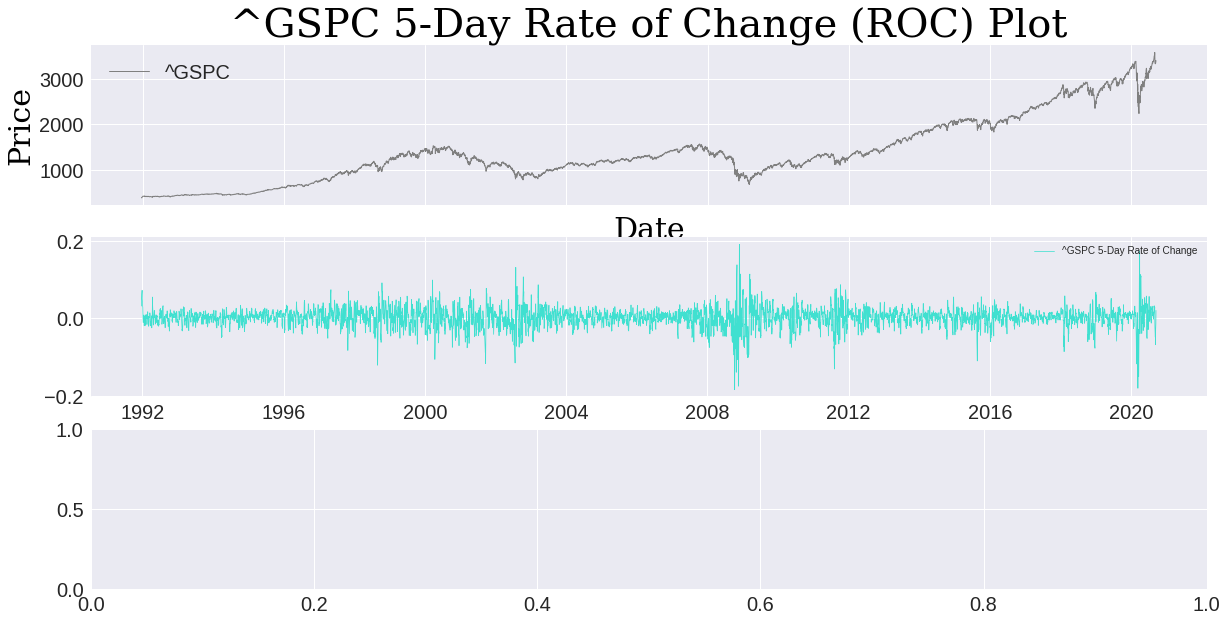

In [ ]:
# Rate of Change code
# Rate of Change (ROC)
def ROC(window,label):
 returns_data["{}_N".format(label)] = returns_data['{} Adj Close'.format(label)].diff(window)
 returns_data["{}_D".format(label)] = returns_data['{} Adj Close'.format(label)].shift(window)
 returns_data["{}_ROC".format(label)] = returns_data["{}_N".format(label)]/returns_data["{}_D".format(label)] 
 
def plot_ROC(window, label):
  fig = plt.figure(figsize=(20,10))
  ax = fig.add_subplot(3, 1, 1)
  ax.set_xticklabels([])
  plt.plot(returns_data['{} Adj Close'.format(label)],lw=1, label = "{}".format(label), color = "grey")
  plt.title('{} {}-Day Rate of Change (ROC) Plot'.format(label, window), fontdict = font)  
  plt.ylabel('Close Price')
  plt.grid(True)
  bx = fig.add_subplot(3, 1, 2)
  plt.plot(returns_data["{}_ROC".format(label)],'turquoise',lw=0.75,linestyle='-',label='{} 5-Day Rate of Change'.format(label))
  plt.legend(loc=1,prop={'size':10}, fontsize = 20)
  plt.grid(True)
  plt.setp(plt.gca().get_xticklabels(), rotation=0)
  ax.set_xlabel("Date",  fontsize = 30, fontdict = font)
  ax.set_ylabel("Price", fontsize = 30, fontdict = font)
  ax.legend(fontsize = 20,)
  
  plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
  plt.rc('ytick', labelsize=20)

  cx = fig.add_subplot(3, 1, 3)
  plt.plot(returns_data["{}_EVM_14d_MA".format(label)],'turquoise',lw=0.75,linestyle='-',label='{} 14-Day EVM'.format(label))
  plt.legend(loc=1,prop={'size':10}, fontsize = 20)
  plt.grid(True)
  ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 25)) # set formatter
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y')) # set font and rotation for date tick labels  
  plt.gcf().autofmt_xdate()
  ax.get_yaxis().set_major_formatter(
  matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
  bx.set_xlabel("Date",  fontsize = 30, fontdict = font)
  bx.set_ylabel("ROC Value", fontsize = 30, fontdict = font)
  bx.legend(fontsize = 20,)
  cx.set_xlabel("Date",  fontsize = 30, fontdict = font)
  cx.set_ylabel("EVM Value", fontsize = 30, fontdict = font)
  cx.legend(fontsize = 20,)


  plt.rc("legend", fontsize = 30)
  plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
  plt.rc('ytick', labelsize=20)
  cx.xaxis.set_major_locator(mdates.MonthLocator(interval = 54)) # set formatter
  cx.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y')) # set font and rotation for date tick labels  

  bx.xaxis.set_major_locator(mdates.MonthLocator(interval = 54)) # set formatter
  bx.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y')) # set font and rotation for date tick labels  
  plt.gcf().autofmt_xdate()
  plt.xticks(rotation = 0)

  plt.savefig("GSPC Rate of Change & Close.pdf")

  
  

  plt.show()
# Compute the 5-period Rate of Change for NIFTY
for tick in tickers:
  ROC(window = 5, label = tick)

for tick in tickers:
  plot_ROC(5, tick)

# Plotting the Price Series chart and the Ease Of Movement below


In [ ]:
def compute_ForceIndex(window, label): 
  returns_data["{}_{}d_FI".format(label, window)] = returns_data['{} Adj Close'.format(label)].diff(window) * volume_data['{} Volume'.format(label)]

# Compute the Force Index
for tick in tickers[0:-1]:
  compute_ForceIndex(5, tick)


In [ ]:
#Moving Average (5, 10, 21, 63, 126, 252)
#Exponential Moving Average (5, 10, 21, 63, 126, 252)
#Rolling Std and Bollinger Bands (5, 10, 21, 63, 126, 252)
#Relative Strength Index (21)
#Stochastic Oscillator(252 days)
#William's R% (252 days)
#Rate of Change (5 days)
#Force Index (5 days)
#Ease of Movement (EVM)
#OSCP
  #Moving Average Convergence Divergence (12-26 day)
#returns_data = returns_data.iloc[252:, :]

#returns_dat

# returns_data = returns_data.drop = ["^GSPC_FI"])
# returns_data.iloc[:, -10]

In [ ]:
tickers = ["^GSPC", "^DJI", "^NYA", "^VIX","^IXIC","^GDAXI",
           "^FCHI", "^HSI", "^N225", "^RUT"]

for ticker in tickers[0:5]:
  returns_data["{}_DailyReturn_t1".format(ticker)] = np.nan
  returns_data["{}_DailyReturn_t2".format(ticker)] = np.nan
  returns_data["{}_DailyReturn_t3".format(ticker)] = np.nan

for ticker in tickers[5:]:
  returns_data["{}_DailyReturn_t".format(ticker)] = np.nan
  returns_data["{}_DailyReturn_t1".format(ticker)] = np.nan
  returns_data["{}_DailyReturn_t2".format(ticker)] = np.nan   


for ticker in tickers[0:5]:
  for i in range(0, len(returns_data)):
    returns_data["{}_DailyReturn_t1".format(ticker)].iloc[i] =\
    returns_data["{} Daily Return".format(ticker)].iloc[i-1]
    returns_data["{}_DailyReturn_t2".format(ticker)].iloc[i] =\
    returns_data["{} Daily Return".format(ticker)].iloc[i-2]
    returns_data["{}_DailyReturn_t3".format(ticker)].iloc[i] =\
    returns_data["{} Daily Return".format(ticker)].iloc[i-3]    

for ticker in tickers[5:]:
  for i in range(0, len(returns_data)):   
    returns_data["{}_DailyReturn_t".format(ticker)].iloc[i] =\
    returns_data["{} Daily Return".format(ticker)].iloc[i]
    returns_data["{}_DailyReturn_t1".format(ticker)].iloc[i] =\
    returns_data["{} Daily Return".format(ticker)].iloc[i-1]
    returns_data["{}_DailyReturn_t2".format(ticker)].iloc[i] =\
    returns_data["{} Daily Return".format(ticker)].iloc[i-2]     

returns_data

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,^GSPC Adj Close,^DJI Adj Close,^NYA Adj Close,^GDAXI Adj Close,^IXIC Adj Close,^FCHI Adj Close,^HSI Adj Close,^N225 Adj Close,^RUT Adj Close,^VIX Adj Close,^GSPC Daily Return,^DJI Daily Return,^NYA Daily Return,^GDAXI Daily Return,^IXIC Daily Return,^FCHI Daily Return,^HSI Daily Return,^N225 Daily Return,^RUT Daily Return,^VIX Daily Return,^GSPC Cumulative Returns,^DJI Cumulative Returns,^NYA Cumulative Returns,^GDAXI Cumulative Returns,^IXIC Cumulative Returns,^FCHI Cumulative Returns,^HSI Cumulative Returns,^N225 Cumulative Returns,^RUT Cumulative Returns,^VIX Cumulative Returns,^GSPC_252d_RSI,^DJI_252d_RSI,^NYA_252d_RSI,^GDAXI_252d_RSI,^IXIC_252d_RSI,^FCHI_252d_RSI,^HSI_252d_RSI,^N225_252d_RSI,^RUT_252d_RSI,^VIX_252d_RSI,...,^VIX_DailyReturn_t2,^VIX_DailyReturn_t3,^IXIC_DailyReturn_t1,^IXIC_DailyReturn_t2,^IXIC_DailyReturn_t3,^GDAXI_DailyReturn_t,^GDAXI_DailyReturn_t1,^GDAXI_DailyReturn_t2,^FCHI_DailyReturn_t,^FCHI_DailyReturn_t1,^FCHI_DailyReturn_t2,^HSI_DailyReturn_t,^HSI_DailyReturn_t1,^HSI_DailyReturn_t2,^N225_DailyReturn_t,^N225_DailyReturn_t1,^N225_DailyReturn_t2,^RUT_DailyReturn_t,^RUT_DailyReturn_t1,^RUT_DailyReturn_t2,^^GSPC Return Direction,^GSPC Return Direction,^^DJI Return Direction,^DJI Return Direction,^^NYA Return Direction,^NYA Return Direction,^^VIX Return Direction,^VIX Return Direction,^^IXIC Return Direction,^IXIC Return Direction,^^GDAXI Return Direction,^GDAXI Return Direction,^^FCHI Return Direction,^FCHI Return Direction,^^HSI Return Direction,^HSI Return Direction,^^N225 Return Direction,^N225 Return Direction,^^RUT Return Direction,^RUT Return Direction
1991-12-16,384.459991,2919.050049,2242.479980,1551.780029,543.729980,1696.800049,4171.700195,22836.669922,178.550003,17.620001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.037961,-0.095591,0.012090,0.018713,-0.006048,NaN,0.001820,-0.000695,NaN,0.003177,0.003524,NaN,0.003753,0.005590,NaN,-0.004432,0.006529,NaN,0.000768,0.026515,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
1991-12-17,382.739990,2902.280029,2233.280029,1562.890015,539.700012,1711.699951,4185.000000,22736.289062,177.660004,18.120001,-0.004474,-0.005745,-0.004103,0.007160,-0.007412,0.008781,0.003188,-0.004396,-0.004985,0.028377,-0.004474,-0.005745,-0.004103,0.007160,-0.007412,0.008781,0.003188,-0.004396,-0.004985,0.028377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.010058,-0.037961,NaN,0.012090,0.018713,0.007160,NaN,0.001820,0.008781,NaN,0.003177,0.003188,NaN,0.003753,-0.004396,NaN,-0.004432,-0.004985,NaN,0.000768,0,NaN,0,NaN,0,NaN,0,1.0,0,NaN,0,1.0,0,1.0,0,1.0,0,NaN,0,NaN
1991-12-18,383.480011,2908.090088,2235.709961,1570.280029,539.840027,1706.199951,4177.700195,22629.900391,177.369995,17.780001,0.001933,0.002002,0.001088,0.004728,0.000259,-0.003213,-0.001744,-0.004679,-0.001632,-0.018764,-0.002549,-0.003755,-0.003019,0.011922,-0.007154,0.005540,0.001438,-0.009054,-0.006609,0.009081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.010058,-0.007412,NaN,0.012090,0.004728,0.007160,NaN,-0.003213,0.008781,NaN,-0.001744,0.003188,NaN,-0.004679,-0.004396,NaN,-0.001632,-0.004985,NaN,0,1.0,0,1.0,0,1.0,0,NaN,0,1.0,0,1.0,0,NaN,0,NaN,0,NaN,0,NaN
1991-12-19,382.519989,2914.360107,2230.110107,1559.260010,534.530029,1684.199951,4182.799805,21991.189453,176.199997,17.959999,-0.002503,0.002156,-0.002505,-0.007018,-0.009836,-0.012894,0.001221,-0.028224,-0.006596,0.010124,-0.005046,-0.001607,-0.005516,0.004820,-0.016920,-0.007426,0.002661,-0.037023,-0.013162,0.019296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.028377,NaN,0.000259,-0.007412,NaN,-0.007018,0.004728,0.007160,-0.012894,-0.003213,0.008781,0.001221,-0.001744,0.003188,-0.028224,-0.004679,-0.004396,-0.006596,-0.001632,-0.004985,0,NaN,0,1.0,0,NaN,0,1.0,0,NaN,0,NaN,0,NaN,0,1.0,0,NaN,0,NaN
1991-12-20,387.040009,2934.479980,2253.580078,1545.869995,535.760010,1648.500000,4142.600098,21777.119141,176

In [ ]:
returns_data.isna().sum()

^GSPC Adj Close               0
^DJI Adj Close                0
^NYA Adj Close                0
^GDAXI Adj Close              0
^IXIC Adj Close               0
                           ... 
^HSI Return Direction      3328
^^N225 Return Direction       0
^N225 Return Direction     3335
^^RUT Return Direction        0
^RUT Return Direction      3290
Length: 541, dtype: int64

In [ ]:
# def get_RMedian(windows, label):
#   for window in windows:
#     returns_data["{}_Returns_{}d_RMedian".format(label ,str(window))] = pd.DataFrame.rolling(
#         returns_data["{} Daily Return".format(label)], window).mean() #rolling mean
# get_RMedian(returns_data["^GSPC Daily Return"], [21])


for tick in tickers:
  returns_data["^{} Return Direction".format(tick)] = 0
  returns_data.loc[
                  returns_data["{} Daily Return".format(tick)] >= 0, 
                  "{} Return Direction".format(tick)] = 1
  returns_data[["{} Daily Return".format(tick), "{} Return Direction".format(tick)]]



,0
^GSPC Adj Close,0
^DJI Adj Close,0
^NYA Adj Close,0
^GDAXI Adj Close,0
^IXIC Adj Close,0
...,...
^HSI Return Direction,3328
^^N225 Return Direction,0
^N225 Return Direction,3335
^^RUT Return Direction,0


In [ ]:
returns_data.isna().sum()
#raw_data = returns_data.iloc[:, :20]
#returns_data = returns_data.iloc[:,20:]
unprocessed_data = returns_data.iloc[:, :30]
preprocessed_data = returns_data.iloc[:, 30:]
unprocessed_data = unprocessed_data.dropna()
preprocessed_data =  preprocessed_data.dropna()

preprocessed_data

In [ ]:
final_data = preprocessed_data.copy()
#final_data = final_data.reset_index(drop = True)

In [ ]:
final_data 

In [ ]:
tmp = pd.DataFrame()
tmp =tmp.dropna()
tmp["Date"] = returns_data.index 
tmp["^GSPC Adj Close"] = returns_data["^GSPC Adj Close"].values
data_FT = tmp[['Date', '^GSPC Adj Close']]

close_fft = np.fft.fft(np.asarray(data_FT['^GSPC Adj Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))
plt.figure(figsize=(20, 10), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_]=0
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data_FT['^GSPC Adj Close'],  label="GSPC")
plt.xlabel('Days', fontsize = 30)
plt.ylabel('Price', fontsize = 30)
plt.title('GSPC Closing Prices & Fourier Transforms', fontdict = font)
plt.legend()
plt.show()




In [ ]:
from collections import deque
items = deque(np.asarray(fft_df['absolute'].tolist()))
items.rotate(int(np.floor(len(fft_df)/2)))
plt.figure(figsize=(10, 7), dpi=80)
plt.stem(items)
plt.title('Figure 4: Components of Fourier transforms')
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from pandas import datetime

series = data_FT['^GSPC Adj Close']
model = ARIMA(series, order=(10, 1, 2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
# Xseries = series.values
# size = int(len(Xseries) * 0.66)
# train, test = Xseries[0:size], Xseries[size:len(X)]
# history = [x for x in train]
# predictions = list()
# for t in range(len(test)):
#     model = ARIMA(history, order=(10,1,2))
#     model_fit = model.fit(disp=0)
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(obs)

In [ ]:
final_data

,^GSPC_3d_MA,^GSPC_5d_MA,^GSPC_10d_MA,^GSPC_21d_MA,^GSPC_3d_RSTD,^GSPC_5d_RSTD,^GSPC_10d_RSTD,^GSPC_21d_RSTD,upper_band_3d,lower_band_3d,upper_band_5d,lower_band_5d,upper_band_10d,lower_band_10d,upper_band_21d,lower_band_21d,^GSPC_3d_EMA,^GSPC_5d_EMA,^GSPC_10d_EMA,^GSPC_21d_EMA,^GSPC_3d_max,^GSPC_5d_max,^GSPC_10d_max,^GSPC_21d_max,^GSPC_3d_min,^GSPC_5d_min,^GSPC_10d_min,^GSPC_21d_min,^GSPC_MACD,^GSPC signal line,^GSPC_14d_RSI,^GSPC_14d_SO%K,^GSPC_14d_SO%D,^GSPC_14d_WR%,^GSPC_14d_EVM,^GSPC_5d_ROC,^GSPC_5d_FI,^GSPC_DailyReturn_t1,^GSPC_DailyReturn_t2,^GSPC_DailyReturn_t3,^DJI_DailyReturn_t1,^DJI_DailyReturn_t2,^DJI_DailyReturn_t3,^NYA_DailyReturn_t1,^NYA_DailyReturn_t2,^NYA_DailyReturn_t3,^VIX_DailyReturn_t1,^VIX_DailyReturn_t2,^VIX_DailyReturn_t3,^IXIC_DailyReturn_t1,^IXIC_DailyReturn_t2,^IXIC_DailyReturn_t3,^GDAXI_DailyReturn_t,^GDAXI_DailyReturn_t1,^GDAXI_DailyReturn_t2,^FCHI_DailyReturn_t,^FCHI_DailyReturn_t1,^FCHI_DailyReturn_t2,^HSI_DailyReturn_t,^HSI_DailyReturn_t1,^HSI_DailyReturn_t2,^N225_DailyReturn_t,^N225_DailyReturn_t1,^N225_DailyReturn_t2,^RUT_DailyReturn_t,^RUT_DailyReturn_t1,^RUT_DailyReturn_t2,^GSPC_Returns_21d_RMedian,^GSPC Return Direction
1992-01-16,419.806661,417.771997,417.926996,408.189998,1.392565,2.967162,2.047821,13.751656,447.657966,391.955356,477.115246,358.428748,458.883425,376.970567,683.223121,133.156875,418.773956,418.370993,416.323116,409.765491,420.769989,420.769989,420.769989,420.769989,418.209991,414.339996,414.339996,382.519989,7.937298,7.954909,73.214401,82.097638,93.323179,-17.902362,2.608685,0.001437,2.017461e+08,0.000785,0.014722,-0.001831,0.003789,0.019023,-0.004344,0.001164,0.013569,-0.002098,0.022340,-0.055525,-0.023848,0.008102,0.013147,0.003135,0.000234,0.020982,0.005591,-0.007152,0.016162,0.010689,0.006708,0.003457,0.009640,-0.007483,0.000000,0.003608,0.000441,0.009637,0.012459,0.004051,0
1992-01-17,419.279989,418.523993,417.878995,409.909998,1.330676,2.570647,2.016405,12.621767,445.893511,392.666466,469.936935,367.111051,458.207100,377.550890,662.345347,157.474649,418.816971,418.533991,416.784365,410.592263,420.769989,420.769989,420.769989,420.769989,418.209991,414.339996,414.339996,382.519989,7.644507,7.892829,73.902368,84.206896,88.143268,-15.793104,2.263400,0.009058,1.080505e+09,-0.006084,0.000785,0.014722,-0.002731,0.003789,0.019023,-0.005564,0.001164,0.013569,0.014376,0.022340,-0.055525,-0.005517,0.008102,0.013147,0.003125,0.000234,0.020982,0.000000,-0.007152,0.016162,0.009701,0.006708,0.003457,-0.013456,-0.007483,0.000000,0.003278,0.000441,0.009637,0.004338,1
1992-01-20,417.809987,418.927991,417.718994,411.475711,1.297113,1.788431,2.071978,11.130494,443.752250,391.867725,454.696603,383.159378,459.158556,376.279432,634.085585,188.865837,417.588478,417.809322,416.707205,411.116602,418.859985,420.769989,420.769989,420.769989,416.359985,416.359985,414.339996,382.519989,7.128566,7.739976,66.796232,52.465337,72.923290,-47.534663,0.899952,0.004875,3.654160e+08,0.001554,-0.006084,0.000785,0.004739,-0.002731,0.003789,0.001477,-0.005564,0.001164,-0.074830,0.014376,0.022340,-0.000781,-0.005517,0.008102,0.009495,0.003125,0.000234,0.003064,0.000000,-0.007152,0.012481,0.009701,0.006708,-0.019115,-0.013456,-0.007483,-0.003706,0.003278,0.000441,0.003962,0
1992-01-21,415.953328,417.367993,417.242996,412.909998,3.129862,3.077273,2.626074,8.937222,478.550569,353.356088,478.913455,355.822532,469.764471,364.721521,591.654442,234.165553,415.114246,416.086220,415.967716,411.255094,418.859985,420.769989,420.769989,420.769989,412.640015,412.640015,412.640015,387.040009,6.346351,7.461251,57.878104,15.779178,50.817137,-84.220822,-0.436480,-0.018552,-1.706247e+09,-0.005969,0.001554,-0.006084,-0.003369,0.004739,-0.002731,-0.005284,0.001477,-0.005564,0.006127,-0.074830,0.014376,-0.011917,-0.000781,-0.005517,0.001145,0.009495,0.003125,0.001072,0.003064,0.000000,0.002594,0.012481,0.009701,-0.002655,-0.019115,-0.013456,-0.016446,-0.003706,0.003278,0.003655,0
1992-01-22,415.710002,416.839996,417.245996,414.39

In [ ]:

# pd.set_option('display.max_rows', X_train_preprocessed.shape[0]+1)
# relevant_features = list(correlations[abs(correlations["^GSPC Return Direction"])>0.05].index)

# X_train_preprocessed_engineering = X_train_preprocessed[relevant_features] 

# X_test_preprocessed_engineering = X_test_preprocessed[relevant_features]

# X_train_preprocessed_engineering



In [ ]:
# correlation_dataset = X_train_preprocessed.append) 
# pd.set_option('display.max_rows', X_train_preprocessed.shape[0]+1)


# relevant_features = list(correlations[abs(correlations["^GSPC Return Direction"])>0.05].index)

# X = X[relevant_features]


KeyError: ignored

Models


# Model Implementations and Metrics!

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))



In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

sigfeat = list(final_data.corr()[abs(final_data.corr()["^GSPC Return Direction"])>0.2].index)

final_data_engineered = final_data[sigfeat]

X,y = final_data_engineered.iloc[:,:-1],final_data_engineered.iloc[:,-1:] 



In [ ]:
# X["^GSPC Return Direction"] = y.shift().values
# X = X.iloc[1:,:]

In [ ]:
X
# X = X[sigfeat]
# X

,^GSPC_14d_RSI,^GSPC_14d_SO%K,^GSPC_14d_WR%,^GSPC_5d_ROC,^GDAXI_DailyReturn_t,^FCHI_DailyReturn_t,^RUT_DailyReturn_t,^GSPC Return Direction
1992-01-17,73.902368,84.206896,-15.793104,0.009058,0.003125,0.000000,0.003278,0.0
1992-01-20,66.796232,52.465337,-47.534663,0.004875,0.009495,0.003064,-0.003706,1.0
1992-01-21,57.878104,15.779178,-84.220822,-0.018552,0.001145,0.001072,-0.016446,0.0
1992-01-22,65.251598,69.067015,-30.932985,-0.006274,-0.004114,-0.014241,0.013785,0.0
1992-01-23,58.846042,36.916730,-63.083270,-0.007771,-0.004934,-0.001412,0.004663,1.0
...,...,...,...,...,...,...,...,...
2020-09-09,50.244357,26.923937,-73.076063,-0.036207,0.020734,0.013966,0.014549,0.0
2020-09-10,44.576493,3.839889,-96.160111,-0.067484,-0.002139,-0.003777,-0.012270,1.0
2020-09-11,44.776288,10.985443,-89.014557,-0.033021,-0.000458,0.002032,-0.006951,0.0
2020-09-14,49.467894,26.318266,-73.681734,-0.012670,-0.000695,0.003524,0.026515,1.0


In [ ]:
tscv = TimeSeriesSplit()
print(tscv)
TimeSeriesSplit(max_train_size=252, n_splits=30)
for train_index, test_index in tscv.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

my_scaler = MinMaxScaler(feature_range = (0,1))
X_train_preprocessed = my_scaler.fit_transform(X_train)
X_test_preprocessed = my_scaler.transform(X_test)

TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [   0    1    2 ... 1203 1204 1205] TEST: [1206 1207 1208 ... 2406 2407 2408]
TRAIN: [   0    1    2 ... 2406 2407 2408] TEST: [2409 2410 2411 ... 3609 3610 3611]
TRAIN: [   0    1    2 ... 3609 3610 3611] TEST: [3612 3613 3614 ... 4812 4813 4814]
TRAIN: [   0    1    2 ... 4812 4813 4814] TEST: [4815 4816 4817 ... 6015 6016 6017]
TRAIN: [   0    1    2 ... 6015 6016 6017] TEST: [6018 6019 6020 ... 7218 7219 7220]


In [ ]:
rbfclf = sk.svm.SVC(kernel = "rbf", max_iter = 10000)

rbfclf.fit(X_train_preprocessed, y_train)

rbfprediction = rbfclf.predict(X_test_preprocessed)


rbfaccuracy = rbfclf.score(X_test_preprocessed, y_test)
rbf_f1_score = sk.metrics.f1_score(y_test, rbfprediction)
rbf_baccuracy = sk.metrics.balanced_accuracy_score(y_test, rbfprediction)
rbf_precision = sk.metrics.precision_score(y_test ,rbfprediction)
rbf_recall = sk.metrics.recall_score(y_test, rbfprediction)

In [ ]:
rbf_f1_score, rbf_precision, rbfaccuracy, rbf_recall

In [ ]:

def input_fn(features, labels, batch_size=252):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    # Shuffle and repeat if you are in training mode.'
    return dataset.batch(batch_size)

my_feature_columns = []
for key in X_train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

    
BRFClassifier = tf.estimator.BoostedTreesClassifier(my_feature_columns, n_batches_per_layer = 1,  
  n_classes = 2, learning_rate = 0.115, n_trees = 80, max_depth = 8)
BRFClassifier.train(input_fn = lambda: input_fn(X_train, y_train), steps = 5000)

In [ ]:
BRFeval_result = BRFClassifier.evaluate(input_fn = lambda: input_fn(X_test,
                                                y_test))
print("\nTest Set Accuracy: {}.\n".format(BRFeval_result))

y_pred = BRFClassifier.predict(X_test)


In [ ]:
tmp = final_data_engineered.rename(columns={
    x: str(y) for x,y in zip(final_data_engineered.columns,range(0,len(final_data_engineered.columns)))})
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X,y = tmp.iloc[:,:-1],tmp.iloc[:,-1:] 

# X["^GSPC Return Direction"] = y.shift().values

# X = X.iloc[1:, :]


tscv = TimeSeriesSplit()
print(tscv)
TimeSeriesSplit(max_train_size=252, n_splits=25)
for train_index, test_index in tscv.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

my_scaler = MinMaxScaler(feature_range = (0,1))
X_train_preprocessed = my_scaler.fit_transform(X_train)
X_test_preprocessed = my_scaler.transform(X_test)
 
# X_train_preprocessed.columns = X_train.columns
# X_test_preprocessed.columns = X_test.columns
# correlation_dataset = X_train_preprocessed.append) 




In [ ]:
def input_fn(features, labels, batch_size=252):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    # Shuffle and repeat if you are in training mode.'
    return dataset.batch(batch_size)

my_feature_columns = []
for key in X_train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)
performance = []
HidUnits = [[15, 10, 5]]
for i in range(len(HidUnits)):
  DNNClassifier = tf.estimator.DNNClassifier(
      hidden_units = HidUnits[i], n_classes = 2, feature_columns = my_feature_columns,
      optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02))

  DNNClassifier.train(input_fn = lambda: input_fn(X_train, y_train), steps = 3000)
  DNNeval_result = DNNClassifier.evaluate(input_fn = lambda: input_fn(X_test, y_test))
  performance.append([DNNeval_result["recall"], DNNeval_result["precision"], 
                      2*(DNNeval_result["precision"]*DNNeval_result["recall"])/(
                          DNNeval_result["precision"]+DNNeval_result["recall"]),
                      DNNeval_result["accuracy"]])


In [ ]:
performance

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

# X,y = final_data.iloc[:,:-1].values, final_data.iloc[:,-1:].values 
# tscv = TimeSeriesSplit()
# print(tscv)
# TimeSeriesSplit(max_train_size=None, n_splits=5)
# for train_index, test_index in tscv.split(X):
#   print("TRAIN:", train_index, "TEST:", test_index)
#   X_train, X_test = X[train_index], X[test_index]
#   y_train, y_test = y[train_index], y[test_index]

tmp = final_data_engineered.rename(columns={x: str(y) for x,y in zip(final_data_engineered.columns,range(0,len(final_data_engineered.columns)))})
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X,y = tmp.iloc[:,:-1],tmp.iloc[:,-1:] 
tscv = TimeSeriesSplit()
print(tscv)
TimeSeriesSplit(max_train_size=None, n_splits=25)
for train_index, test_index in tscv.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

my_scaler = MinMaxScaler(feature_range = (0,1))
X_train_preprocessed = my_scaler.fit_transform(X_train)
X_test_preprocessed = my_scaler.transform(X_test)

# X_train_preprocessed.columns = X_train.columns
# X_test_preprocessed.columns = X_test.columns
# correlation_dataset = X_train_preprocessed.append) 
# X_train_preprocessed["^GSPC Return Direction"] = y_train.iloc[:,0].values



# pd.set_option('display.max_rows', X_train_preprocessed.shape[0]+1)

# correlations = pd.DataFrame(X_train_preprocessed.corr()["^GSPC Return Direction"][:68])

# del X_train_preprocessed["^GSPC Return Direction"]

# relevant_features = list(correlations[abs(correlations["^GSPC Return Direction"])>0.05].index)

# X_train_preprocessed_engineering = X_train_preprocessed[relevant_features] 

# X_test_preprocessed_engineering = X_test_preprocessed[relevant_features]

# X_test_preprocessed_engineering, X_train_preprocessed_engineering, y_test, y_train = X_test_preprocessed_engineering.values, X_train_preprocessed_engineering.values, y_test.values, y_train.values


X_train = X_train_preprocessed.reshape((X_train_preprocessed.shape[0], 1, X_train_preprocessed.shape[1]))
X_test = X_test_preprocessed.reshape((X_test_preprocessed.shape[0], 1, X_test_preprocessed.shape[1]))
print(X_train_preprocessed.shape, y_train.shape, X_test_preprocessed.shape, y_test.shape)



In [ ]:
model=tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units = 15, input_shape = (X_train_preprocessed.shape[0], X_train_preprocessed.shape[1]),
                                activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "relu"))
model.add(tf.keras.layers.Dense(5, activation = "relu"))
model.add(tf.keras.layers.Dense(1, activation = "softmax"))
opt = tf.keras.optimizers.Adam(learning_rate = .05)
model.compile(optimizer = "Adam", metrics  = ["acc"], 
              loss = "mae")
model.fit(X_train_preprocessed, y_train, 
          batch_size = 100, epochs = 3000, shuffle = False)


In [ ]:


model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1000, input_shape = (X_train.shape[1], X_train.shape[2]),
                                activation = "relu"))
model.add(tf.keras.layers.Dense(units = 250, activation = "relu"))
model.add(tf.keras.layers.Dense(units = 1, activation="softmax"))
opt = tf.keras.optimizers.Adadelta(learning_rate = 0.02)
model.compile(optimizer = opt, metrics = [
    "accuracy"], 
              loss = "mse")
#out_batch = NBatchLogger(display=1000)
model.fit(X_train, y_train, 
          batch_size = 21, epochs = 100, shuffle = True)


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(units = 15, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 10, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = "softmax"))
opt = tf.keras.optimizers.Adagrad(learning_rate = 0.01)
model.compile(optimizer = opt, loss = 'mse', metrics = ["accuracy"])



model.fit(X_train, y_train, epochs = 50, batch_size = 20, shuffle = True)

predicted_stock_price = model.predict(X_test)


m = tf.keras.metrics.Accuracy()

In [ ]:
m.update_state(y_test, predicted_stock_price)
predicted_stock_price

In [ ]:
import pandas as pd
import numpy as np
import os
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l1_l2
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)

class Double_Tanh(Activation):
    def __init__(self, activation, **kwargs):
        super(Double_Tanh, self).__init__(activation, **kwargs)
        self.__name__ = 'double_tanh'

def double_tanh(x):
    return (K.tanh(x) * 2)

get_custom_objects().update({'double_tanh':Double_Tanh(double_tanh)})


# design network
model = Sequential()
model.add(LSTM(25, input_shape=(X_train.shape[1], X_train.shape[2])))

model.add(Activation(double_tanh))
model.add(tf.keras.layers.Dense(units = 1, activation = "softmax"))

model.compile(loss="categorical_crossentropy", optimizer= opt,
metrics=["mse", "mae", "accuracy"])
# fit network
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test),
                    verbose=2, shuffle=False)
# plot history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
model = Sequential()
model.add(LSTM(units=3, return_sequences = True,
               input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=2, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=3, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=2, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units =1))
model.compile(optimizer="adam",loss="mean_squared_error", metrics = ["accuracy",f1_m,precision_m, recall_m])
model.fit(X_train, y_train, epochs = 50, batch_size = 32, verbose=2)


predicted_stock_price = model.predict(X_test)



In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.03, epochs=10, verbose=0)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=2)

In [ ]:
#write up start with exploratory data analysis and methods 
#shift data for your own stocks (consu;t 6)
#split data
#train random forest, neural networks, svm, and arima
#table results
